# 1. Exploratory data analysis

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.applications.resnet import ResNet50

In [ ]:
labels=pd.read_csv('/datasets/faces/labels.csv')

In [ ]:
print(labels.head())
print(labels.info)

    file_name  real_age
0  000000.jpg         4
1  000001.jpg        18
2  000002.jpg        80
3  000003.jpg        50
4  000004.jpg        17
<bound method DataFrame.info of        file_name  real_age
0     000000.jpg         4
1     000001.jpg        18
2     000002.jpg        80
3     000003.jpg        50
4     000004.jpg        17
...          ...       ...
7586  007608.jpg        14
7587  007609.jpg        37
7588  007610.jpg        28
7589  007611.jpg        20
7590  007612.jpg        47

[7591 rows x 2 columns]>


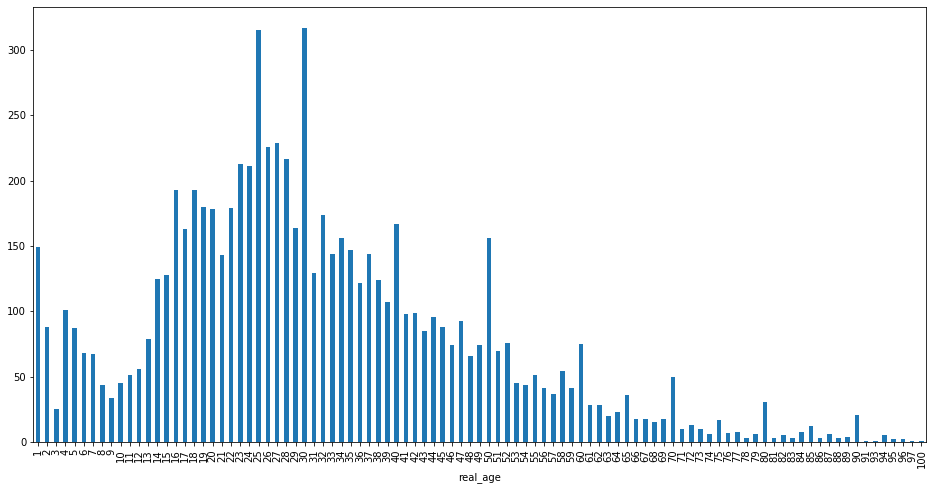

In [ ]:
data=labels.groupby(['real_age'])['real_age'].count()
data.plot(kind='bar', figsize=(16,8))

In [ ]:
train_datagen1=ImageDataGenerator(rescale=1/255)
train_datagen_flow1 = train_datagen1.flow_from_dataframe(dataframe=labels, directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

new=next(train_datagen_flow1)
print(new)

Found 7591 validated image filenames.
(array([[[[0.5764706 , 0.5137255 , 0.454902  ],
         [0.53333336, 0.47058827, 0.41176474],
         [0.5294118 , 0.4666667 , 0.40784317],
         ...,
         [0.48235297, 0.4156863 , 0.30588236],
         [0.49411768, 0.427451  , 0.31764707],
         [0.49803925, 0.43137258, 0.32156864]],

        [[0.5176471 , 0.454902  , 0.39607847],
         [0.5058824 , 0.4431373 , 0.38431376],
         [0.5529412 , 0.4901961 , 0.43137258],
         ...,
         [0.49803925, 0.43137258, 0.32156864],
         [0.50980395, 0.4431373 , 0.33333334],
         [0.50980395, 0.4431373 , 0.33333334]],

        [[0.5176471 , 0.45098042, 0.38823533],
         [0.5058824 , 0.43921572, 0.37647063],
         [0.5176471 , 0.45098042, 0.38823533],
         ...,
         [0.5019608 , 0.43529415, 0.3254902 ],
         [0.50980395, 0.4431373 , 0.33333334],
         [0.5058824 , 0.43921572, 0.32941177]],

        ...,

        [[0.06666667, 0.45882356, 0.52156866],
      

# 2. Model training

Transfer the model training code and the result of printing on the screen here.


(The code in this section is run on a separate GPU platform, so it is not designed as a cell with a code, but as a code in a text cell)

```python

# < paste code here >

def load_train(path):
    train_datagen=ImageDataGenerator(rescale=1/255, validation_split=0.25, horizontal_flip=True)
    train_datagen_flow = train_datagen.flow_from_dataframe(dataframe=pd.read_csv(path + 'labels.csv'), 
                                                           directory=path + 'final_files/', x_col='file_name', 
                                                           y_col='real_age', target_size=(224, 224), batch_size=16, 
                                                           class_mode='raw', subset='training', seed=12345) 
    
    return train_datagen_flow

def load_test(path):
    test_datagen=ImageDataGenerator(rescale=1/255, validation_split=0.25)
    test_datagen_flow = test_datagen.flow_from_dataframe(dataframe=pd.read_csv(path + 'labels.csv'), 
                                                           directory=path + 'final_files/', x_col='file_name', 
                                                           y_col='real_age', target_size=(224, 224), batch_size=16, 
                                                           class_mode='raw', subset='validation', seed=12345) 
    
    return test_datagen_flow

def create_model(input_shape):
    backbone = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
    model = Sequential()
    optimizer = Adam(lr=0.0001)
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu')) 
    model.compile(optimizer=optimizer, loss='mse',metrics=['mae'])
    return model 

def train_model(model, train_data, test_data, batch_size=None, epochs=5, steps_per_epoch=None, validation_steps=None):
    
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    
    model.fit(train_data, validation_data=test_data, batch_size=batch_size, epochs=epochs, steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps)

    return model

```

```

# < paste the result of printing on the screen here >
# < you can delete long lines with model downloading>

Found 5694 validated image filenames.
Found 1897 validated image filenames.

Train for 356 steps, validate for 119 steps
Epoch 1/5

1/356 [..............................] - ETA: 2:33:24 - loss: 1314.5967 - mae: 34.4136
  2/356 [..............................] - ETA: 1:16:45 - loss: 1140.1717 - mae: 30.3483
  3/356 [..............................] - ETA: 51:09 - loss: 1412.0421 - mae: 32.8543  
  4/356 [..............................] - ETA: 38:21 - loss: 1448.2199 - mae: 33.7420
  5/356 [..............................] - ETA: 30:41 - loss: 1481.1844 - mae: 34.0285
  6/356 [..............................] - ETA: 25:33 - loss: 1423.6811 - mae: 33.3486
  7/356 [..............................] - ETA: 21:54 - loss: 1470.7639 - mae: 33.9006
  8/356 [..............................] - ETA: 19:10 - loss: 1408.0548 - mae: 33.1900
  9/356 [..............................] - ETA: 17:01 - loss: 1399.6166 - mae: 33.1530
 10/356 [..............................] - ETA: 15:19 - loss: 1364.1729 - mae: 32.4730
 11/356 [..............................] - ETA: 13:55 - loss: 1346.9512 - mae: 32.2877
 12/356 [>.............................] - ETA: 12:48 - loss: 1320.0728 - mae: 31.8109
 13/356 [>.............................] - ETA: 11:56 - loss: 1293.6532 - mae: 31.4819
 14/356 [>.............................] - ETA: 11:14 - loss: 1286.4091 - mae: 31.4045
 15/356 [>.............................] - ETA: 10:35 - loss: 1269.5925 - mae: 31.2593
 16/356 [>.............................] - ETA: 10:03 - loss: 1212.5640 - mae: 30.2250
 17/356 [>.............................] - ETA: 9:33 - loss: 1206.2839 - mae: 30.0992 
 18/356 [>.............................] - ETA: 9:05 - loss: 1195.7512 - mae: 29.9904
 19/356 [>.............................] - ETA: 8:41 - loss: 1200.2374 - mae: 30.0655
 20/356 [>.............................] - ETA: 8:20 - loss: 1168.3412 - mae: 29.6344
 21/356 [>.............................] - ETA: 8:00 - loss: 1154.0760 - mae: 29.4705
 22/356 [>.............................] - ETA: 7:41 - loss: 1118.3910 - mae: 28.7984
 23/356 [>.............................] - ETA: 7:24 - loss: 1096.8729 - mae: 28.4428
 24/356 [=>............................] - ETA: 7:08 - loss: 1081.7017 - mae: 28.2899
 25/356 [=>............................] - ETA: 6:53 - loss: 1078.0039 - mae: 28.2439
 26/356 [=>............................] - ETA: 6:39 - loss: 1063.8901 - mae: 27.9042
 27/356 [=>............................] - ETA: 6:26 - loss: 1063.0149 - mae: 27.8362
 28/356 [=>............................] - ETA: 6:14 - loss: 1039.5508 - mae: 27.2989
 29/356 [=>............................] - ETA: 6:03 - loss: 1017.2624 - mae: 26.8807
 30/356 [=>............................] - ETA: 5:53 - loss: 993.0055 - mae: 26.4822 
 31/356 [=>............................] - ETA: 5:43 - loss: 981.0475 - mae: 26.3243
 32/356 [=>............................] - ETA: 5:34 - loss: 965.2736 - mae: 26.1359
 33/356 [=>............................] - ETA: 5:27 - loss: 943.2946 - mae: 25.7477
 34/356 [=>............................] - ETA: 5:19 - loss: 924.9960 - mae: 25.4522
 35/356 [=>............................] - ETA: 5:12 - loss: 916.7353 - mae: 25.2932
 36/356 [==>...........................] - ETA: 5:03 - loss: 904.6741 - mae: 25.1160
 37/356 [==>...........................] - ETA: 4:56 - loss: 890.8214 - mae: 24.8699
 38/356 [==>...........................] - ETA: 4:49 - loss: 879.7099 - mae: 24.6384
 39/356 [==>...........................] - ETA: 4:42 - loss: 867.5498 - mae: 24.4113
 40/356 [==>...........................] - ETA: 4:37 - loss: 855.7817 - mae: 24.1987
 41/356 [==>...........................] - ETA: 4:31 - loss: 841.1966 - mae: 23.9526
 42/356 [==>...........................] - ETA: 4:26 - loss: 829.1625 - mae: 23.7503
 43/356 [==>...........................] - ETA: 4:21 - loss: 815.8264 - mae: 23.5193
 44/356 [==>...........................] - ETA: 4:16 - loss: 802.7191 - mae: 23.2766
 45/356 [==>...........................] - ETA: 4:11 - loss: 792.3689 - mae: 23.0625
 46/356 [==>...........................] - ETA: 4:06 - loss: 786.7453 - mae: 22.9483
 47/356 [==>...........................] - ETA: 4:03 - loss: 771.9579 - mae: 22.6353
 48/356 [===>..........................] - ETA: 3:58 - loss: 761.1296 - mae: 22.4363
 49/356 [===>..........................] - ETA: 3:54 - loss: 749.3671 - mae: 22.1808
 50/356 [===>..........................] - ETA: 3:49 - loss: 737.9301 - mae: 21.9551
 51/356 [===>..........................] - ETA: 3:46 - loss: 727.4422 - mae: 21.7570
 52/356 [===>..........................] - ETA: 3:41 - loss: 718.5016 - mae: 21.5548
 53/356 [===>..........................] - ETA: 3:38 - loss: 713.4187 - mae: 21.4738
 54/356 [===>..........................] - ETA: 3:34 - loss: 702.0284 - mae: 21.2138
 55/356 [===>..........................] - ETA: 3:31 - loss: 693.9069 - mae: 21.0625
 56/356 [===>..........................] - ETA: 3:27 - loss: 687.5942 - mae: 20.9647
 57/356 [===>..........................] - ETA: 3:24 - loss: 681.8024 - mae: 20.8466
 58/356 [===>..........................] - ETA: 3:21 - loss: 675.3995 - mae: 20.7308
 59/356 [===>..........................] - ETA: 3:18 - loss: 666.8870 - mae: 20.5602
 60/356 [====>.........................] - ETA: 3:16 - loss: 658.1416 - mae: 20.3613
 61/356 [====>.........................] - ETA: 3:13 - loss: 649.9093 - mae: 20.1897
 62/356 [====>.........................] - ETA: 3:10 - loss: 642.2853 - mae: 20.0282
 63/356 [====>.........................] - ETA: 3:07 - loss: 635.7694 - mae: 19.9016
 64/356 [====>.........................] - ETA: 3:04 - loss: 629.5657 - mae: 19.7607
 65/356 [====>.........................] - ETA: 3:01 - loss: 621.9656 - mae: 19.5922
 66/356 [====>.........................] - ETA: 2:59 - loss: 614.9390 - mae: 19.4540
 67/356 [====>.........................] - ETA: 2:56 - loss: 612.9270 - mae: 19.4288
 68/356 [====>.........................] - ETA: 2:54 - loss: 605.6194 - mae: 19.2776
 69/356 [====>.........................] - ETA: 2:52 - loss: 599.2605 - mae: 19.1488
 70/356 [====>.........................] - ETA: 2:49 - loss: 593.1747 - mae: 19.0110
 71/356 [====>.........................] - ETA: 2:47 - loss: 587.6781 - mae: 18.8821
 72/356 [=====>........................] - ETA: 2:45 - loss: 584.8276 - mae: 18.8344
 73/356 [=====>........................] - ETA: 2:43 - loss: 577.9075 - mae: 18.6673
 74/356 [=====>........................] - ETA: 2:41 - loss: 572.0832 - mae: 18.5442
 75/356 [=====>........................] - ETA: 2:39 - loss: 567.1892 - mae: 18.4562
 76/356 [=====>........................] - ETA: 2:37 - loss: 560.6096 - mae: 18.2926
 77/356 [=====>........................] - ETA: 2:35 - loss: 557.8957 - mae: 18.2443
 78/356 [=====>........................] - ETA: 2:33 - loss: 555.5045 - mae: 18.1873
 79/356 [=====>........................] - ETA: 2:31 - loss: 551.9207 - mae: 18.0813
 80/356 [=====>........................] - ETA: 2:29 - loss: 547.4096 - mae: 17.9971
 81/356 [=====>........................] - ETA: 2:27 - loss: 542.0433 - mae: 17.8796
 82/356 [=====>........................] - ETA: 2:26 - loss: 536.7496 - mae: 17.7589
 83/356 [=====>........................] - ETA: 2:24 - loss: 532.3974 - mae: 17.6874
 84/356 [======>.......................] - ETA: 2:22 - loss: 527.0265 - mae: 17.5689
 85/356 [======>.......................] - ETA: 2:21 - loss: 522.9497 - mae: 17.4781
 86/356 [======>.......................] - ETA: 2:19 - loss: 518.4538 - mae: 17.3748
 87/356 [======>.......................] - ETA: 2:17 - loss: 513.3769 - mae: 17.2488
 88/356 [======>.......................] - ETA: 2:16 - loss: 509.4968 - mae: 17.1623
 89/356 [======>.......................] - ETA: 2:15 - loss: 505.0743 - mae: 17.0599
 90/356 [======>.......................] - ETA: 2:13 - loss: 501.3017 - mae: 16.9835
 91/356 [======>.......................] - ETA: 2:12 - loss: 497.2491 - mae: 16.8969
 92/356 [======>.......................] - ETA: 2:10 - loss: 492.9812 - mae: 16.8030
 93/356 [======>.......................] - ETA: 2:09 - loss: 489.4149 - mae: 16.7260
 94/356 [======>.......................] - ETA: 2:07 - loss: 486.0900 - mae: 16.6418
 95/356 [=======>......................] - ETA: 2:06 - loss: 482.4381 - mae: 16.5633
 96/356 [=======>......................] - ETA: 2:05 - loss: 478.7755 - mae: 16.4853
 97/356 [=======>......................] - ETA: 2:03 - loss: 475.0855 - mae: 16.4054
 98/356 [=======>......................] - ETA: 2:02 - loss: 472.2595 - mae: 16.3515
 99/356 [=======>......................] - ETA: 2:01 - loss: 468.3992 - mae: 16.2675
100/356 [=======>......................] - ETA: 2:00 - loss: 464.6673 - mae: 16.1911
101/356 [=======>......................] - ETA: 1:59 - loss: 461.8913 - mae: 16.1430
102/356 [=======>......................] - ETA: 1:57 - loss: 458.0337 - mae: 16.0529
103/356 [=======>......................] - ETA: 1:56 - loss: 454.9543 - mae: 15.9822
104/356 [=======>......................] - ETA: 1:55 - loss: 451.3760 - mae: 15.8986
105/356 [=======>......................] - ETA: 1:54 - loss: 448.8411 - mae: 15.8526
106/356 [=======>......................] - ETA: 1:53 - loss: 445.5947 - mae: 15.7673
107/356 [========>.....................] - ETA: 1:52 - loss: 442.2040 - mae: 15.6816
108/356 [========>.....................] - ETA: 1:51 - loss: 439.7012 - mae: 15.6248
109/356 [========>.....................] - ETA: 1:50 - loss: 437.2120 - mae: 15.5764
110/356 [========>.....................] - ETA: 1:49 - loss: 433.8176 - mae: 15.4979
111/356 [========>.....................] - ETA: 1:48 - loss: 431.8349 - mae: 15.4607
112/356 [========>.....................] - ETA: 1:47 - loss: 429.4060 - mae: 15.4113
113/356 [========>.....................] - ETA: 1:46 - loss: 426.3758 - mae: 15.3430
114/356 [========>.....................] - ETA: 1:45 - loss: 423.5695 - mae: 15.2820
115/356 [========>.....................] - ETA: 1:44 - loss: 421.0013 - mae: 15.2294
116/356 [========>.....................] - ETA: 1:43 - loss: 418.6955 - mae: 15.1902
117/356 [========>.....................] - ETA: 1:42 - loss: 417.4308 - mae: 15.1599
118/356 [========>.....................] - ETA: 1:41 - loss: 417.0656 - mae: 15.1448
119/356 [=========>....................] - ETA: 1:40 - loss: 415.7362 - mae: 15.1319
120/356 [=========>....................] - ETA: 1:39 - loss: 414.6493 - mae: 15.1122
121/356 [=========>....................] - ETA: 1:38 - loss: 412.4105 - mae: 15.0699
122/356 [=========>....................] - ETA: 1:37 - loss: 409.8857 - mae: 15.0185
123/356 [=========>....................] - ETA: 1:36 - loss: 407.6641 - mae: 14.9744
124/356 [=========>....................] - ETA: 1:35 - loss: 406.4627 - mae: 14.9552
125/356 [=========>....................] - ETA: 1:35 - loss: 404.3853 - mae: 14.9170
126/356 [=========>....................] - ETA: 1:34 - loss: 401.9550 - mae: 14.8579
127/356 [=========>....................] - ETA: 1:33 - loss: 400.2252 - mae: 14.8262
128/356 [=========>....................] - ETA: 1:32 - loss: 397.4559 - mae: 14.7590
129/356 [=========>....................] - ETA: 1:31 - loss: 395.4617 - mae: 14.7001
130/356 [=========>....................] - ETA: 1:31 - loss: 394.4663 - mae: 14.7028
131/356 [==========>...................] - ETA: 1:30 - loss: 392.3138 - mae: 14.6595
132/356 [==========>...................] - ETA: 1:29 - loss: 389.9879 - mae: 14.6034
133/356 [==========>...................] - ETA: 1:28 - loss: 387.7374 - mae: 14.5537
134/356 [==========>...................] - ETA: 1:28 - loss: 386.0797 - mae: 14.5158
135/356 [==========>...................] - ETA: 1:27 - loss: 384.4767 - mae: 14.4883
136/356 [==========>...................] - ETA: 1:26 - loss: 382.5404 - mae: 14.4455
137/356 [==========>...................] - ETA: 1:25 - loss: 381.4519 - mae: 14.4297
138/356 [==========>...................] - ETA: 1:25 - loss: 379.6912 - mae: 14.3967
139/356 [==========>...................] - ETA: 1:24 - loss: 377.7087 - mae: 14.3518
140/356 [==========>...................] - ETA: 1:23 - loss: 376.1139 - mae: 14.3224
141/356 [==========>...................] - ETA: 1:23 - loss: 377.3632 - mae: 14.3249
142/356 [==========>...................] - ETA: 1:22 - loss: 375.7733 - mae: 14.2900
143/356 [===========>..................] - ETA: 1:21 - loss: 374.6863 - mae: 14.2734
144/356 [===========>..................] - ETA: 1:21 - loss: 372.6279 - mae: 14.2272
145/356 [===========>..................] - ETA: 1:20 - loss: 370.5675 - mae: 14.1730
146/356 [===========>..................] - ETA: 1:20 - loss: 369.5549 - mae: 14.1550
147/356 [===========>..................] - ETA: 1:19 - loss: 368.1080 - mae: 14.1298
148/356 [===========>..................] - ETA: 1:18 - loss: 366.2966 - mae: 14.0869
149/356 [===========>..................] - ETA: 1:18 - loss: 365.0173 - mae: 14.0645
150/356 [===========>..................] - ETA: 1:17 - loss: 363.1150 - mae: 14.0198
151/356 [===========>..................] - ETA: 1:16 - loss: 361.8404 - mae: 13.9882
152/356 [===========>..................] - ETA: 1:16 - loss: 360.0438 - mae: 13.9482
153/356 [===========>..................] - ETA: 1:15 - loss: 358.1341 - mae: 13.9007
154/356 [===========>..................] - ETA: 1:14 - loss: 356.5077 - mae: 13.8594
155/356 [============>.................] - ETA: 1:14 - loss: 354.6619 - mae: 13.8154
156/356 [============>.................] - ETA: 1:13 - loss: 353.1153 - mae: 13.7811
157/356 [============>.................] - ETA: 1:13 - loss: 352.2107 - mae: 13.7616
158/356 [============>.................] - ETA: 1:12 - loss: 350.5281 - mae: 13.7212
159/356 [============>.................] - ETA: 1:12 - loss: 349.0483 - mae: 13.6905
160/356 [============>.................] - ETA: 1:11 - loss: 347.3415 - mae: 13.6537
161/356 [============>.................] - ETA: 1:11 - loss: 346.3742 - mae: 13.6396
162/356 [============>.................] - ETA: 1:10 - loss: 345.0902 - mae: 13.6070
163/356 [============>.................] - ETA: 1:09 - loss: 343.4233 - mae: 13.5710
164/356 [============>.................] - ETA: 1:09 - loss: 342.2604 - mae: 13.5495
165/356 [============>.................] - ETA: 1:09 - loss: 341.2992 - mae: 13.5308
166/356 [============>.................] - ETA: 1:08 - loss: 339.8085 - mae: 13.4933
167/356 [=============>................] - ETA: 1:07 - loss: 338.5960 - mae: 13.4710
168/356 [=============>................] - ETA: 1:07 - loss: 337.3840 - mae: 13.4424
169/356 [=============>................] - ETA: 1:06 - loss: 336.3283 - mae: 13.4200
170/356 [=============>................] - ETA: 1:06 - loss: 335.0304 - mae: 13.3924
171/356 [=============>................] - ETA: 1:05 - loss: 333.5502 - mae: 13.3570
172/356 [=============>................] - ETA: 1:05 - loss: 332.1497 - mae: 13.3222
173/356 [=============>................] - ETA: 1:04 - loss: 331.0624 - mae: 13.3012
174/356 [=============>................] - ETA: 1:04 - loss: 329.7981 - mae: 13.2714
175/356 [=============>................] - ETA: 1:03 - loss: 329.7993 - mae: 13.2819
176/356 [=============>................] - ETA: 1:03 - loss: 328.5042 - mae: 13.2494
177/356 [=============>................] - ETA: 1:02 - loss: 328.1330 - mae: 13.2426
178/356 [==============>...............] - ETA: 1:02 - loss: 327.1733 - mae: 13.2186
179/356 [==============>...............] - ETA: 1:01 - loss: 326.0398 - mae: 13.1918
180/356 [==============>...............] - ETA: 1:01 - loss: 324.8626 - mae: 13.1676
181/356 [==============>...............] - ETA: 1:00 - loss: 323.8468 - mae: 13.1451
182/356 [==============>...............] - ETA: 1:00 - loss: 322.8375 - mae: 13.1236
183/356 [==============>...............] - ETA: 59s - loss: 322.0583 - mae: 13.1053 
184/356 [==============>...............] - ETA: 59s - loss: 320.5144 - mae: 13.0630
185/356 [==============>...............] - ETA: 58s - loss: 319.1443 - mae: 13.0315
186/356 [==============>...............] - ETA: 58s - loss: 317.8890 - mae: 13.0034
187/356 [==============>...............] - ETA: 57s - loss: 316.4329 - mae: 12.9620
188/356 [==============>...............] - ETA: 57s - loss: 315.0953 - mae: 12.9302
189/356 [==============>...............] - ETA: 56s - loss: 314.9863 - mae: 12.9197
190/356 [===============>..............] - ETA: 56s - loss: 314.3511 - mae: 12.9003
191/356 [===============>..............] - ETA: 56s - loss: 313.2535 - mae: 12.8697
192/356 [===============>..............] - ETA: 55s - loss: 312.1648 - mae: 12.8460
193/356 [===============>..............] - ETA: 55s - loss: 310.7930 - mae: 12.8085
194/356 [===============>..............] - ETA: 54s - loss: 309.5810 - mae: 12.7763
195/356 [===============>..............] - ETA: 54s - loss: 308.2962 - mae: 12.7465
196/356 [===============>..............] - ETA: 53s - loss: 307.5178 - mae: 12.7389
197/356 [===============>..............] - ETA: 53s - loss: 306.5207 - mae: 12.7183
198/356 [===============>..............] - ETA: 53s - loss: 305.2989 - mae: 12.6870
199/356 [===============>..............] - ETA: 52s - loss: 304.5709 - mae: 12.6719
200/356 [===============>..............] - ETA: 52s - loss: 304.0965 - mae: 12.6648
201/356 [===============>..............] - ETA: 51s - loss: 303.5072 - mae: 12.6568
202/356 [================>.............] - ETA: 51s - loss: 302.6525 - mae: 12.6391
203/356 [================>.............] - ETA: 50s - loss: 302.0504 - mae: 12.6178
204/356 [================>.............] - ETA: 50s - loss: 301.1787 - mae: 12.5987
205/356 [================>.............] - ETA: 50s - loss: 300.0596 - mae: 12.5700
206/356 [================>.............] - ETA: 49s - loss: 298.9441 - mae: 12.5417
207/356 [================>.............] - ETA: 49s - loss: 298.2481 - mae: 12.5310
208/356 [================>.............] - ETA: 48s - loss: 297.8250 - mae: 12.5210
209/356 [================>.............] - ETA: 48s - loss: 297.0795 - mae: 12.5042
210/356 [================>.............] - ETA: 47s - loss: 297.9497 - mae: 12.5151
211/356 [================>.............] - ETA: 47s - loss: 297.4432 - mae: 12.5080
212/356 [================>.............] - ETA: 47s - loss: 296.4994 - mae: 12.4877
213/356 [================>.............] - ETA: 46s - loss: 295.6278 - mae: 12.4705
214/356 [=================>............] - ETA: 46s - loss: 294.8156 - mae: 12.4522
215/356 [=================>............] - ETA: 45s - loss: 293.8814 - mae: 12.4211
216/356 [=================>............] - ETA: 45s - loss: 292.7587 - mae: 12.3889
217/356 [=================>............] - ETA: 45s - loss: 291.8727 - mae: 12.3655
218/356 [=================>............] - ETA: 44s - loss: 291.2101 - mae: 12.3535
219/356 [=================>............] - ETA: 44s - loss: 290.4971 - mae: 12.3410
220/356 [=================>............] - ETA: 43s - loss: 290.0943 - mae: 12.3309
221/356 [=================>............] - ETA: 43s - loss: 289.1944 - mae: 12.3082
222/356 [=================>............] - ETA: 43s - loss: 288.1442 - mae: 12.2813
223/356 [=================>............] - ETA: 42s - loss: 287.5246 - mae: 12.2653
224/356 [=================>............] - ETA: 42s - loss: 286.6437 - mae: 12.2454
225/356 [=================>............] - ETA: 41s - loss: 285.9242 - mae: 12.2291
226/356 [==================>...........] - ETA: 41s - loss: 285.0236 - mae: 12.2095
227/356 [==================>...........] - ETA: 41s - loss: 284.2901 - mae: 12.1973
228/356 [==================>...........] - ETA: 40s - loss: 283.4864 - mae: 12.1736
229/356 [==================>...........] - ETA: 40s - loss: 282.8517 - mae: 12.1657
230/356 [==================>...........] - ETA: 39s - loss: 282.2810 - mae: 12.1548
231/356 [==================>...........] - ETA: 39s - loss: 281.5225 - mae: 12.1429
232/356 [==================>...........] - ETA: 39s - loss: 280.8989 - mae: 12.1305
233/356 [==================>...........] - ETA: 38s - loss: 280.0825 - mae: 12.1102
234/356 [==================>...........] - ETA: 38s - loss: 279.6486 - mae: 12.0987
235/356 [==================>...........] - ETA: 37s - loss: 279.1915 - mae: 12.0873
236/356 [==================>...........] - ETA: 37s - loss: 278.7095 - mae: 12.0796
237/356 [==================>...........] - ETA: 37s - loss: 278.4468 - mae: 12.0767
238/356 [===================>..........] - ETA: 36s - loss: 277.8385 - mae: 12.0640
239/356 [===================>..........] - ETA: 36s - loss: 276.9591 - mae: 12.0420
240/356 [===================>..........] - ETA: 35s - loss: 276.2554 - mae: 12.0267
241/356 [===================>..........] - ETA: 35s - loss: 275.9587 - mae: 12.0257
242/356 [===================>..........] - ETA: 35s - loss: 275.1169 - mae: 12.0036
243/356 [===================>..........] - ETA: 34s - loss: 274.5836 - mae: 11.9953
244/356 [===================>..........] - ETA: 34s - loss: 273.8576 - mae: 11.9797
245/356 [===================>..........] - ETA: 34s - loss: 273.3288 - mae: 11.9665
246/356 [===================>..........] - ETA: 33s - loss: 272.7647 - mae: 11.9536
247/356 [===================>..........] - ETA: 33s - loss: 272.0295 - mae: 11.9374
248/356 [===================>..........] - ETA: 33s - loss: 271.4325 - mae: 11.9235
249/356 [===================>..........] - ETA: 32s - loss: 270.5443 - mae: 11.8988
250/356 [====================>.........] - ETA: 32s - loss: 270.0260 - mae: 11.8871
251/356 [====================>.........] - ETA: 31s - loss: 269.5189 - mae: 11.8785
252/356 [====================>.........] - ETA: 31s - loss: 268.7842 - mae: 11.8660
253/356 [====================>.........] - ETA: 31s - loss: 268.0719 - mae: 11.8459
254/356 [====================>.........] - ETA: 30s - loss: 267.5834 - mae: 11.8404
255/356 [====================>.........] - ETA: 30s - loss: 266.9326 - mae: 11.8246
256/356 [====================>.........] - ETA: 30s - loss: 266.1029 - mae: 11.8029
257/356 [====================>.........] - ETA: 29s - loss: 265.4659 - mae: 11.7921
258/356 [====================>.........] - ETA: 29s - loss: 264.9354 - mae: 11.7828
259/356 [====================>.........] - ETA: 29s - loss: 264.2639 - mae: 11.7699
260/356 [====================>.........] - ETA: 28s - loss: 264.0965 - mae: 11.7627
261/356 [====================>.........] - ETA: 28s - loss: 263.5272 - mae: 11.7476
262/356 [=====================>........] - ETA: 28s - loss: 262.9814 - mae: 11.7354
263/356 [=====================>........] - ETA: 27s - loss: 262.8732 - mae: 11.7366
264/356 [=====================>........] - ETA: 27s - loss: 262.6216 - mae: 11.7330
265/356 [=====================>........] - ETA: 27s - loss: 262.3140 - mae: 11.7298
266/356 [=====================>........] - ETA: 26s - loss: 261.9159 - mae: 11.7216
267/356 [=====================>........] - ETA: 26s - loss: 261.1300 - mae: 11.6982
268/356 [=====================>........] - ETA: 26s - loss: 260.7518 - mae: 11.6904
269/356 [=====================>........] - ETA: 25s - loss: 260.0943 - mae: 11.6740
270/356 [=====================>........] - ETA: 25s - loss: 259.2828 - mae: 11.6505
271/356 [=====================>........] - ETA: 25s - loss: 258.7165 - mae: 11.6372
272/356 [=====================>........] - ETA: 24s - loss: 258.0060 - mae: 11.6198
273/356 [======================>.......] - ETA: 24s - loss: 257.4335 - mae: 11.6085
274/356 [======================>.......] - ETA: 24s - loss: 256.7462 - mae: 11.5903
275/356 [======================>.......] - ETA: 23s - loss: 256.1078 - mae: 11.5740
276/356 [======================>.......] - ETA: 23s - loss: 255.6698 - mae: 11.5697
277/356 [======================>.......] - ETA: 23s - loss: 255.1715 - mae: 11.5624
278/356 [======================>.......] - ETA: 22s - loss: 254.5333 - mae: 11.5430
279/356 [======================>.......] - ETA: 22s - loss: 254.0331 - mae: 11.5347
280/356 [======================>.......] - ETA: 22s - loss: 253.5341 - mae: 11.5235
281/356 [======================>.......] - ETA: 21s - loss: 253.2043 - mae: 11.5204
282/356 [======================>.......] - ETA: 21s - loss: 253.2996 - mae: 11.5276
283/356 [======================>.......] - ETA: 21s - loss: 252.6121 - mae: 11.5067
284/356 [======================>.......] - ETA: 20s - loss: 252.2536 - mae: 11.5001
285/356 [=======================>......] - ETA: 20s - loss: 251.6397 - mae: 11.4849
286/356 [=======================>......] - ETA: 20s - loss: 251.3239 - mae: 11.4781
287/356 [=======================>......] - ETA: 19s - loss: 250.8263 - mae: 11.4656
288/356 [=======================>......] - ETA: 19s - loss: 250.4387 - mae: 11.4593
289/356 [=======================>......] - ETA: 19s - loss: 249.9262 - mae: 11.4507
290/356 [=======================>......] - ETA: 19s - loss: 249.3697 - mae: 11.4379
291/356 [=======================>......] - ETA: 18s - loss: 249.1622 - mae: 11.4370
292/356 [=======================>......] - ETA: 18s - loss: 248.6000 - mae: 11.4255
293/356 [=======================>......] - ETA: 18s - loss: 248.4666 - mae: 11.4295
294/356 [=======================>......] - ETA: 17s - loss: 247.8970 - mae: 11.4173
295/356 [=======================>......] - ETA: 17s - loss: 247.2972 - mae: 11.4023
296/356 [=======================>......] - ETA: 17s - loss: 246.6775 - mae: 11.3839
297/356 [========================>.....] - ETA: 16s - loss: 246.0531 - mae: 11.3664
298/356 [========================>.....] - ETA: 16s - loss: 245.5793 - mae: 11.3534
299/356 [========================>.....] - ETA: 16s - loss: 245.1268 - mae: 11.3416
300/356 [========================>.....] - ETA: 16s - loss: 244.6751 - mae: 11.3323
301/356 [========================>.....] - ETA: 15s - loss: 244.2839 - mae: 11.3269
302/356 [========================>.....] - ETA: 15s - loss: 244.1053 - mae: 11.3298
303/356 [========================>.....] - ETA: 15s - loss: 243.6653 - mae: 11.3224
304/356 [========================>.....] - ETA: 14s - loss: 244.1883 - mae: 11.3343
305/356 [========================>.....] - ETA: 14s - loss: 243.4628 - mae: 11.3098
306/356 [========================>.....] - ETA: 14s - loss: 242.9305 - mae: 11.2955
307/356 [========================>.....] - ETA: 13s - loss: 242.3999 - mae: 11.2794
308/356 [========================>.....] - ETA: 13s - loss: 241.9382 - mae: 11.2665
309/356 [=========================>....] - ETA: 13s - loss: 241.5211 - mae: 11.2585
310/356 [=========================>....] - ETA: 13s - loss: 240.9400 - mae: 11.2433
311/356 [=========================>....] - ETA: 12s - loss: 240.3444 - mae: 11.2256
312/356 [=========================>....] - ETA: 12s - loss: 239.9570 - mae: 11.2176
313/356 [=========================>....] - ETA: 12s - loss: 240.3013 - mae: 11.2184
314/356 [=========================>....] - ETA: 11s - loss: 239.8671 - mae: 11.2102
315/356 [=========================>....] - ETA: 11s - loss: 239.7325 - mae: 11.2017
316/356 [=========================>....] - ETA: 11s - loss: 239.4165 - mae: 11.1952
317/356 [=========================>....] - ETA: 10s - loss: 238.8610 - mae: 11.1797
318/356 [=========================>....] - ETA: 10s - loss: 238.4159 - mae: 11.1680
319/356 [=========================>....] - ETA: 10s - loss: 237.9592 - mae: 11.1587
320/356 [=========================>....] - ETA: 10s - loss: 237.4097 - mae: 11.1424
321/356 [==========================>...] - ETA: 9s - loss: 237.2571 - mae: 11.1446 
322/356 [==========================>...] - ETA: 9s - loss: 236.8842 - mae: 11.1345
323/356 [==========================>...] - ETA: 9s - loss: 236.6435 - mae: 11.1324
324/356 [==========================>...] - ETA: 8s - loss: 236.4509 - mae: 11.1333
325/356 [==========================>...] - ETA: 8s - loss: 235.8448 - mae: 11.1158
326/356 [==========================>...] - ETA: 8s - loss: 235.3358 - mae: 11.1034
327/356 [==========================>...] - ETA: 8s - loss: 234.9908 - mae: 11.0956
328/356 [==========================>...] - ETA: 7s - loss: 234.7415 - mae: 11.0853
329/356 [==========================>...] - ETA: 7s - loss: 234.4770 - mae: 11.0799
330/356 [==========================>...] - ETA: 7s - loss: 234.3606 - mae: 11.0783
331/356 [==========================>...] - ETA: 6s - loss: 233.9269 - mae: 11.0666
332/356 [==========================>...] - ETA: 6s - loss: 233.6263 - mae: 11.0608
333/356 [===========================>..] - ETA: 6s - loss: 233.2882 - mae: 11.0508
334/356 [===========================>..] - ETA: 6s - loss: 232.9807 - mae: 11.0432
335/356 [===========================>..] - ETA: 5s - loss: 232.5087 - mae: 11.0336
336/356 [===========================>..] - ETA: 5s - loss: 232.3296 - mae: 11.0280
337/356 [===========================>..] - ETA: 5s - loss: 232.0115 - mae: 11.0201
338/356 [===========================>..] - ETA: 4s - loss: 231.6414 - mae: 11.0115
339/356 [===========================>..] - ETA: 4s - loss: 231.2758 - mae: 11.0036
340/356 [===========================>..] - ETA: 4s - loss: 230.8408 - mae: 10.9932
341/356 [===========================>..] - ETA: 4s - loss: 230.5228 - mae: 10.9834
342/356 [===========================>..] - ETA: 3s - loss: 230.2696 - mae: 10.9803
343/356 [===========================>..] - ETA: 3s - loss: 229.9090 - mae: 10.9735
344/356 [===========================>..] - ETA: 3s - loss: 229.6441 - mae: 10.9695
345/356 [============================>.] - ETA: 2s - loss: 229.2260 - mae: 10.9574
346/356 [============================>.] - ETA: 2s - loss: 228.7617 - mae: 10.9457
347/356 [============================>.] - ETA: 2s - loss: 228.5451 - mae: 10.9434
348/356 [============================>.] - ETA: 2s - loss: 228.3326 - mae: 10.9432
349/356 [============================>.] - ETA: 1s - loss: 228.2359 - mae: 10.9438
350/356 [============================>.] - ETA: 1s - loss: 227.9361 - mae: 10.9379
351/356 [============================>.] - ETA: 1s - loss: 227.7835 - mae: 10.9341
352/356 [============================>.] - ETA: 1s - loss: 227.3416 - mae: 10.9210
353/356 [============================>.] - ETA: 0s - loss: 227.1383 - mae: 10.9194
354/356 [============================>.] - ETA: 0s - loss: 226.9440 - mae: 10.9147
355/356 [============================>.] - ETA: 0s - loss: 226.6299 - mae: 10.9095
356/356 [==============================] - 119s 335ms/step - loss: 226.4306 - mae: 10.9054 - val_loss: 606.6963 - val_mae: 19.2770
Epoch 2/5

  1/356 [..............................] - ETA: 56s - loss: 105.9705 - mae: 8.3406
  2/356 [..............................] - ETA: 1:07 - loss: 80.2064 - mae: 7.0773
  3/356 [..............................] - ETA: 53s - loss: 79.8026 - mae: 7.0998 
  4/356 [..............................] - ETA: 46s - loss: 78.4291 - mae: 7.1367
  5/356 [..............................] - ETA: 41s - loss: 76.5885 - mae: 7.0331
  6/356 [..............................] - ETA: 40s - loss: 90.1162 - mae: 7.4761
  7/356 [..............................] - ETA: 38s - loss: 115.8527 - mae: 8.3168
  8/356 [..............................] - ETA: 36s - loss: 136.8074 - mae: 8.9669
  9/356 [..............................] - ETA: 34s - loss: 137.8304 - mae: 8.7001
 10/356 [..............................] - ETA: 33s - loss: 133.2168 - mae: 8.5696
 11/356 [..............................] - ETA: 32s - loss: 131.0322 - mae: 8.5442
 12/356 [>.............................] - ETA: 32s - loss: 128.6512 - mae: 8.4621
 13/356 [>.............................] - ETA: 34s - loss: 122.5895 - mae: 8.3003
 14/356 [>.............................] - ETA: 34s - loss: 116.5387 - mae: 8.0860
 15/356 [>.............................] - ETA: 34s - loss: 111.9762 - mae: 7.8884
 16/356 [>.............................] - ETA: 34s - loss: 108.5190 - mae: 7.8033
 17/356 [>.............................] - ETA: 33s - loss: 106.2026 - mae: 7.7770
 18/356 [>.............................] - ETA: 33s - loss: 106.4727 - mae: 7.8330
 19/356 [>.............................] - ETA: 33s - loss: 104.3342 - mae: 7.7764
 20/356 [>.............................] - ETA: 32s - loss: 101.0292 - mae: 7.6271
 21/356 [>.............................] - ETA: 31s - loss: 114.1613 - mae: 7.9120
 22/356 [>.............................] - ETA: 32s - loss: 112.0156 - mae: 7.8632
 23/356 [>.............................] - ETA: 31s - loss: 111.3786 - mae: 7.8897
 24/356 [=>............................] - ETA: 31s - loss: 111.8005 - mae: 7.9779
 25/356 [=>............................] - ETA: 31s - loss: 112.3289 - mae: 8.0258
 26/356 [=>............................] - ETA: 31s - loss: 114.3925 - mae: 8.1575
 27/356 [=>............................] - ETA: 31s - loss: 112.0240 - mae: 8.0597
 28/356 [=>............................] - ETA: 31s - loss: 109.3406 - mae: 7.9492
 29/356 [=>............................] - ETA: 30s - loss: 109.0309 - mae: 7.9584
 30/356 [=>............................] - ETA: 30s - loss: 106.5889 - mae: 7.8404
 31/356 [=>............................] - ETA: 30s - loss: 105.9043 - mae: 7.8276
 32/356 [=>............................] - ETA: 30s - loss: 104.2832 - mae: 7.7799
 33/356 [=>............................] - ETA: 29s - loss: 103.1922 - mae: 7.7593
 34/356 [=>............................] - ETA: 29s - loss: 102.0707 - mae: 7.7148
 35/356 [=>............................] - ETA: 29s - loss: 100.8370 - mae: 7.6728
 36/356 [==>...........................] - ETA: 29s - loss: 98.7755 - mae: 7.5789 
 37/356 [==>...........................] - ETA: 29s - loss: 97.7655 - mae: 7.5277
 38/356 [==>...........................] - ETA: 29s - loss: 96.8681 - mae: 7.4856
 39/356 [==>...........................] - ETA: 29s - loss: 94.9008 - mae: 7.3871
 40/356 [==>...........................] - ETA: 28s - loss: 95.7270 - mae: 7.4107
 41/356 [==>...........................] - ETA: 28s - loss: 95.2457 - mae: 7.3890
 42/356 [==>...........................] - ETA: 29s - loss: 97.0648 - mae: 7.4435
 43/356 [==>...........................] - ETA: 29s - loss: 95.5255 - mae: 7.3760
 44/356 [==>...........................] - ETA: 28s - loss: 95.1437 - mae: 7.3647
 45/356 [==>...........................] - ETA: 28s - loss: 94.3475 - mae: 7.3382
 46/356 [==>...........................] - ETA: 28s - loss: 93.1686 - mae: 7.2894
 47/356 [==>...........................] - ETA: 28s - loss: 92.8098 - mae: 7.2884
 48/356 [===>..........................] - ETA: 27s - loss: 92.1950 - mae: 7.2677
 49/356 [===>..........................] - ETA: 27s - loss: 92.0835 - mae: 7.2624
 50/356 [===>..........................] - ETA: 27s - loss: 90.7308 - mae: 7.2013
 51/356 [===>..........................] - ETA: 27s - loss: 90.0445 - mae: 7.1784
 52/356 [===>..........................] - ETA: 27s - loss: 89.5723 - mae: 7.1668
 53/356 [===>..........................] - ETA: 27s - loss: 90.6228 - mae: 7.2109
 54/356 [===>..........................] - ETA: 27s - loss: 90.1673 - mae: 7.1927
 55/356 [===>..........................] - ETA: 27s - loss: 89.0289 - mae: 7.1426
 56/356 [===>..........................] - ETA: 26s - loss: 88.2635 - mae: 7.1072
 57/356 [===>..........................] - ETA: 26s - loss: 87.6744 - mae: 7.0926
 58/356 [===>..........................] - ETA: 26s - loss: 87.6280 - mae: 7.0879
 59/356 [===>..........................] - ETA: 26s - loss: 87.6397 - mae: 7.1019
 60/356 [====>.........................] - ETA: 26s - loss: 87.7757 - mae: 7.1212
 61/356 [====>.........................] - ETA: 26s - loss: 87.0718 - mae: 7.0838
 62/356 [====>.........................] - ETA: 26s - loss: 87.0077 - mae: 7.0885
 63/356 [====>.........................] - ETA: 26s - loss: 86.9593 - mae: 7.0829
 64/356 [====>.........................] - ETA: 26s - loss: 86.4948 - mae: 7.0684
 65/356 [====>.........................] - ETA: 26s - loss: 86.1329 - mae: 7.0542
 66/356 [====>.........................] - ETA: 26s - loss: 87.0288 - mae: 7.0872
 67/356 [====>.........................] - ETA: 26s - loss: 86.6948 - mae: 7.0864
 68/356 [====>.........................] - ETA: 26s - loss: 86.2141 - mae: 7.0660
 69/356 [====>.........................] - ETA: 25s - loss: 86.6809 - mae: 7.0922
 70/356 [====>.........................] - ETA: 25s - loss: 87.0080 - mae: 7.1125
 71/356 [====>.........................] - ETA: 25s - loss: 86.1076 - mae: 7.0654
 72/356 [=====>........................] - ETA: 25s - loss: 85.5390 - mae: 7.0394
 73/356 [=====>........................] - ETA: 25s - loss: 84.9663 - mae: 7.0205
 74/356 [=====>........................] - ETA: 25s - loss: 85.3901 - mae: 7.0563
 75/356 [=====>........................] - ETA: 25s - loss: 85.8513 - mae: 7.0838
 76/356 [=====>........................] - ETA: 25s - loss: 85.4195 - mae: 7.0689
 77/356 [=====>........................] - ETA: 24s - loss: 85.4627 - mae: 7.0797
 78/356 [=====>........................] - ETA: 24s - loss: 85.3198 - mae: 7.0788
 79/356 [=====>........................] - ETA: 24s - loss: 84.8796 - mae: 7.0602
 80/356 [=====>........................] - ETA: 24s - loss: 84.3624 - mae: 7.0408
 81/356 [=====>........................] - ETA: 24s - loss: 84.0940 - mae: 7.0407
 82/356 [=====>........................] - ETA: 24s - loss: 84.2673 - mae: 7.0566
 83/356 [=====>........................] - ETA: 24s - loss: 83.9701 - mae: 7.0459
 84/356 [======>.......................] - ETA: 23s - loss: 84.4676 - mae: 7.0760
 85/356 [======>.......................] - ETA: 23s - loss: 84.2304 - mae: 7.0646
 86/356 [======>.......................] - ETA: 23s - loss: 84.4219 - mae: 7.0830
 87/356 [======>.......................] - ETA: 23s - loss: 83.9619 - mae: 7.0665
 88/356 [======>.......................] - ETA: 23s - loss: 84.6106 - mae: 7.0948
 89/356 [======>.......................] - ETA: 23s - loss: 84.4023 - mae: 7.0827
 90/356 [======>.......................] - ETA: 23s - loss: 83.8663 - mae: 7.0574
 91/356 [======>.......................] - ETA: 23s - loss: 83.5999 - mae: 7.0377
 92/356 [======>.......................] - ETA: 22s - loss: 83.4439 - mae: 7.0346
 93/356 [======>.......................] - ETA: 22s - loss: 84.2743 - mae: 7.0567
 94/356 [======>.......................] - ETA: 22s - loss: 84.4790 - mae: 7.0639
 95/356 [=======>......................] - ETA: 22s - loss: 84.8387 - mae: 7.0885
 96/356 [=======>......................] - ETA: 22s - loss: 84.6909 - mae: 7.0809
 97/356 [=======>......................] - ETA: 22s - loss: 84.0880 - mae: 7.0527
 98/356 [=======>......................] - ETA: 22s - loss: 83.5521 - mae: 7.0246
 99/356 [=======>......................] - ETA: 22s - loss: 83.1369 - mae: 7.0044
100/356 [=======>......................] - ETA: 21s - loss: 82.5696 - mae: 6.9745
101/356 [=======>......................] - ETA: 22s - loss: 82.4696 - mae: 6.9775
102/356 [=======>......................] - ETA: 22s - loss: 83.3336 - mae: 7.0225
103/356 [=======>......................] - ETA: 21s - loss: 83.1503 - mae: 7.0133
104/356 [=======>......................] - ETA: 21s - loss: 83.2844 - mae: 7.0236
105/356 [=======>......................] - ETA: 21s - loss: 83.2108 - mae: 7.0197
106/356 [=======>......................] - ETA: 21s - loss: 83.1666 - mae: 7.0185
107/356 [========>.....................] - ETA: 21s - loss: 82.8923 - mae: 7.0065
108/356 [========>.....................] - ETA: 21s - loss: 83.1148 - mae: 6.9997
109/356 [========>.....................] - ETA: 21s - loss: 83.2265 - mae: 7.0031
110/356 [========>.....................] - ETA: 21s - loss: 83.5195 - mae: 7.0065
111/356 [========>.....................] - ETA: 21s - loss: 83.3179 - mae: 6.9997
112/356 [========>.....................] - ETA: 20s - loss: 82.9535 - mae: 6.9839
113/356 [========>.....................] - ETA: 20s - loss: 82.6590 - mae: 6.9765
114/356 [========>.....................] - ETA: 20s - loss: 82.3638 - mae: 6.9634
115/356 [========>.....................] - ETA: 20s - loss: 82.4895 - mae: 6.9780
116/356 [========>.....................] - ETA: 20s - loss: 82.8890 - mae: 6.9970
117/356 [========>.....................] - ETA: 20s - loss: 82.5399 - mae: 6.9799
118/356 [========>.....................] - ETA: 20s - loss: 82.3690 - mae: 6.9738
119/356 [=========>....................] - ETA: 20s - loss: 82.9706 - mae: 6.9898
120/356 [=========>....................] - ETA: 20s - loss: 83.0239 - mae: 6.9924
121/356 [=========>....................] - ETA: 20s - loss: 83.0050 - mae: 6.9912
122/356 [=========>....................] - ETA: 20s - loss: 82.7797 - mae: 6.9829
123/356 [=========>....................] - ETA: 20s - loss: 82.8556 - mae: 6.9876
124/356 [=========>....................] - ETA: 20s - loss: 83.0460 - mae: 6.9939
125/356 [=========>....................] - ETA: 19s - loss: 83.5527 - mae: 6.9998
126/356 [=========>....................] - ETA: 19s - loss: 83.2578 - mae: 6.9871
127/356 [=========>....................] - ETA: 19s - loss: 82.8829 - mae: 6.9708
128/356 [=========>....................] - ETA: 20s - loss: 83.2125 - mae: 6.9900
129/356 [=========>....................] - ETA: 19s - loss: 83.0803 - mae: 6.9818
130/356 [=========>....................] - ETA: 20s - loss: 83.4113 - mae: 7.0028
131/356 [==========>...................] - ETA: 19s - loss: 83.1393 - mae: 6.9933
132/356 [==========>...................] - ETA: 19s - loss: 82.9038 - mae: 6.9862
133/356 [==========>...................] - ETA: 19s - loss: 83.7050 - mae: 7.0147
134/356 [==========>...................] - ETA: 19s - loss: 83.5610 - mae: 7.0126
135/356 [==========>...................] - ETA: 19s - loss: 83.3795 - mae: 7.0092
136/356 [==========>...................] - ETA: 19s - loss: 83.4402 - mae: 7.0149
137/356 [==========>...................] - ETA: 19s - loss: 83.1837 - mae: 7.0065
138/356 [==========>...................] - ETA: 19s - loss: 82.9517 - mae: 6.9987
139/356 [==========>...................] - ETA: 19s - loss: 82.6897 - mae: 6.9869
140/356 [==========>...................] - ETA: 19s - loss: 82.2652 - mae: 6.9632
141/356 [==========>...................] - ETA: 19s - loss: 82.1995 - mae: 6.9649
142/356 [==========>...................] - ETA: 19s - loss: 81.9560 - mae: 6.9567
143/356 [===========>..................] - ETA: 18s - loss: 82.1427 - mae: 6.9668
144/356 [===========>..................] - ETA: 18s - loss: 82.5071 - mae: 6.9779
145/356 [===========>..................] - ETA: 18s - loss: 82.8184 - mae: 6.9936
146/356 [===========>..................] - ETA: 18s - loss: 82.7138 - mae: 6.9896
147/356 [===========>..................] - ETA: 18s - loss: 82.5747 - mae: 6.9871
148/356 [===========>..................] - ETA: 18s - loss: 82.5484 - mae: 6.9839
149/356 [===========>..................] - ETA: 18s - loss: 83.9015 - mae: 7.0280
150/356 [===========>..................] - ETA: 18s - loss: 83.8463 - mae: 7.0324
151/356 [===========>..................] - ETA: 18s - loss: 84.0425 - mae: 7.0358
152/356 [===========>..................] - ETA: 18s - loss: 83.9232 - mae: 7.0328
153/356 [===========>..................] - ETA: 18s - loss: 84.2196 - mae: 7.0519
154/356 [===========>..................] - ETA: 17s - loss: 84.3814 - mae: 7.0598
155/356 [============>.................] - ETA: 17s - loss: 84.1690 - mae: 7.0503
156/356 [============>.................] - ETA: 17s - loss: 84.3538 - mae: 7.0659
157/356 [============>.................] - ETA: 17s - loss: 84.2972 - mae: 7.0642
158/356 [============>.................] - ETA: 17s - loss: 84.2364 - mae: 7.0624
159/356 [============>.................] - ETA: 17s - loss: 84.0446 - mae: 7.0516
160/356 [============>.................] - ETA: 17s - loss: 84.1470 - mae: 7.0538
161/356 [============>.................] - ETA: 17s - loss: 84.4333 - mae: 7.0624
162/356 [============>.................] - ETA: 17s - loss: 84.0559 - mae: 7.0445
163/356 [============>.................] - ETA: 17s - loss: 84.0793 - mae: 7.0516
164/356 [============>.................] - ETA: 16s - loss: 84.9141 - mae: 7.0752
165/356 [============>.................] - ETA: 16s - loss: 84.7350 - mae: 7.0660
166/356 [============>.................] - ETA: 16s - loss: 84.3346 - mae: 7.0452
167/356 [=============>................] - ETA: 16s - loss: 84.4240 - mae: 7.0547
168/356 [=============>................] - ETA: 16s - loss: 84.2603 - mae: 7.0499
169/356 [=============>................] - ETA: 16s - loss: 84.1438 - mae: 7.0446
170/356 [=============>................] - ETA: 16s - loss: 84.0272 - mae: 7.0363
171/356 [=============>................] - ETA: 16s - loss: 83.8790 - mae: 7.0321
172/356 [=============>................] - ETA: 16s - loss: 83.9244 - mae: 7.0335
173/356 [=============>................] - ETA: 16s - loss: 83.8391 - mae: 7.0318
174/356 [=============>................] - ETA: 15s - loss: 84.4846 - mae: 7.0545
175/356 [=============>................] - ETA: 15s - loss: 85.7924 - mae: 7.0763
176/356 [=============>................] - ETA: 15s - loss: 85.9150 - mae: 7.0856
177/356 [=============>................] - ETA: 15s - loss: 85.7881 - mae: 7.0807
178/356 [==============>...............] - ETA: 15s - loss: 85.4334 - mae: 7.0631
179/356 [==============>...............] - ETA: 15s - loss: 85.2659 - mae: 7.0603
180/356 [==============>...............] - ETA: 15s - loss: 85.4084 - mae: 7.0697
181/356 [==============>...............] - ETA: 15s - loss: 85.5161 - mae: 7.0697
182/356 [==============>...............] - ETA: 15s - loss: 85.5134 - mae: 7.0674
183/356 [==============>...............] - ETA: 15s - loss: 85.6979 - mae: 7.0670
184/356 [==============>...............] - ETA: 15s - loss: 85.5900 - mae: 7.0647
185/356 [==============>...............] - ETA: 14s - loss: 85.5641 - mae: 7.0657
186/356 [==============>...............] - ETA: 14s - loss: 85.4692 - mae: 7.0615
187/356 [==============>...............] - ETA: 14s - loss: 85.3956 - mae: 7.0578
188/356 [==============>...............] - ETA: 14s - loss: 85.5552 - mae: 7.0695
189/356 [==============>...............] - ETA: 14s - loss: 85.2382 - mae: 7.0559
190/356 [===============>..............] - ETA: 14s - loss: 85.1183 - mae: 7.0516
191/356 [===============>..............] - ETA: 14s - loss: 84.9293 - mae: 7.0444
192/356 [===============>..............] - ETA: 14s - loss: 84.6237 - mae: 7.0297
193/356 [===============>..............] - ETA: 14s - loss: 84.9682 - mae: 7.0488
194/356 [===============>..............] - ETA: 14s - loss: 85.1006 - mae: 7.0535
195/356 [===============>..............] - ETA: 14s - loss: 85.9177 - mae: 7.0836
196/356 [===============>..............] - ETA: 14s - loss: 86.2383 - mae: 7.0995
197/356 [===============>..............] - ETA: 13s - loss: 86.1358 - mae: 7.0970
198/356 [===============>..............] - ETA: 13s - loss: 86.2068 - mae: 7.1016
199/356 [===============>..............] - ETA: 13s - loss: 86.3968 - mae: 7.1146
200/356 [===============>..............] - ETA: 13s - loss: 86.4310 - mae: 7.1190
201/356 [===============>..............] - ETA: 13s - loss: 86.2780 - mae: 7.1148
202/356 [================>.............] - ETA: 13s - loss: 86.3994 - mae: 7.1183
203/356 [================>.............] - ETA: 13s - loss: 86.3457 - mae: 7.1185
204/356 [================>.............] - ETA: 13s - loss: 86.2972 - mae: 7.1189
205/356 [================>.............] - ETA: 13s - loss: 86.2294 - mae: 7.1157
206/356 [================>.............] - ETA: 13s - loss: 86.0408 - mae: 7.1086
207/356 [================>.............] - ETA: 12s - loss: 85.8632 - mae: 7.1016
208/356 [================>.............] - ETA: 12s - loss: 85.8690 - mae: 7.1039
209/356 [================>.............] - ETA: 12s - loss: 86.0035 - mae: 7.1128
210/356 [================>.............] - ETA: 12s - loss: 85.8709 - mae: 7.1090
211/356 [================>.............] - ETA: 12s - loss: 85.7511 - mae: 7.1039
212/356 [================>.............] - ETA: 12s - loss: 85.8479 - mae: 7.1136
213/356 [================>.............] - ETA: 12s - loss: 85.8959 - mae: 7.1138
214/356 [=================>............] - ETA: 12s - loss: 85.6860 - mae: 7.1055
215/356 [=================>............] - ETA: 12s - loss: 85.4874 - mae: 7.0974
216/356 [=================>............] - ETA: 12s - loss: 85.4158 - mae: 7.0896
217/356 [=================>............] - ETA: 12s - loss: 85.2856 - mae: 7.0839
218/356 [=================>............] - ETA: 11s - loss: 85.3060 - mae: 7.0847
219/356 [=================>............] - ETA: 11s - loss: 85.1752 - mae: 7.0811
220/356 [=================>............] - ETA: 11s - loss: 85.0346 - mae: 7.0786
221/356 [=================>............] - ETA: 11s - loss: 84.8916 - mae: 7.0738
222/356 [=================>............] - ETA: 11s - loss: 85.0218 - mae: 7.0779
223/356 [=================>............] - ETA: 11s - loss: 85.0673 - mae: 7.0775
224/356 [=================>............] - ETA: 11s - loss: 85.3173 - mae: 7.0905
225/356 [=================>............] - ETA: 11s - loss: 85.3325 - mae: 7.0911
226/356 [==================>...........] - ETA: 11s - loss: 85.4064 - mae: 7.0975
227/356 [==================>...........] - ETA: 11s - loss: 85.5481 - mae: 7.1043
228/356 [==================>...........] - ETA: 11s - loss: 85.3977 - mae: 7.0995
229/356 [==================>...........] - ETA: 11s - loss: 85.2634 - mae: 7.0944
230/356 [==================>...........] - ETA: 10s - loss: 85.2117 - mae: 7.0906
231/356 [==================>...........] - ETA: 10s - loss: 85.1804 - mae: 7.0909
232/356 [==================>...........] - ETA: 10s - loss: 85.3197 - mae: 7.0930
233/356 [==================>...........] - ETA: 10s - loss: 85.9909 - mae: 7.1162
234/356 [==================>...........] - ETA: 10s - loss: 85.9921 - mae: 7.1146
235/356 [==================>...........] - ETA: 10s - loss: 85.7855 - mae: 7.1025
236/356 [==================>...........] - ETA: 10s - loss: 85.8312 - mae: 7.1073
237/356 [==================>...........] - ETA: 10s - loss: 85.8676 - mae: 7.1082
238/356 [===================>..........] - ETA: 10s - loss: 85.7132 - mae: 7.1001
239/356 [===================>..........] - ETA: 10s - loss: 85.6649 - mae: 7.0964
240/356 [===================>..........] - ETA: 10s - loss: 85.7315 - mae: 7.1023
241/356 [===================>..........] - ETA: 10s - loss: 85.7635 - mae: 7.1062
242/356 [===================>..........] - ETA: 9s - loss: 85.8395 - mae: 7.1056 
243/356 [===================>..........] - ETA: 9s - loss: 85.9957 - mae: 7.1101
244/356 [===================>..........] - ETA: 9s - loss: 86.2876 - mae: 7.1217
245/356 [===================>..........] - ETA: 9s - loss: 86.2437 - mae: 7.1197
246/356 [===================>..........] - ETA: 9s - loss: 87.5434 - mae: 7.1301
247/356 [===================>..........] - ETA: 9s - loss: 87.5541 - mae: 7.1300
248/356 [===================>..........] - ETA: 9s - loss: 87.3778 - mae: 7.1212
249/356 [===================>..........] - ETA: 9s - loss: 87.8544 - mae: 7.1414
250/356 [====================>.........] - ETA: 9s - loss: 88.0443 - mae: 7.1511
251/356 [====================>.........] - ETA: 9s - loss: 87.8276 - mae: 7.1386
252/356 [====================>.........] - ETA: 9s - loss: 87.6823 - mae: 7.1341
253/356 [====================>.........] - ETA: 9s - loss: 87.6259 - mae: 7.1324
254/356 [====================>.........] - ETA: 8s - loss: 87.6301 - mae: 7.1303
255/356 [====================>.........] - ETA: 8s - loss: 87.5695 - mae: 7.1308
256/356 [====================>.........] - ETA: 8s - loss: 87.4294 - mae: 7.1209
257/356 [====================>.........] - ETA: 8s - loss: 87.2054 - mae: 7.1108
258/356 [====================>.........] - ETA: 8s - loss: 87.0756 - mae: 7.1056
259/356 [====================>.........] - ETA: 8s - loss: 86.9581 - mae: 7.1022
260/356 [====================>.........] - ETA: 8s - loss: 86.9453 - mae: 7.1022
261/356 [====================>.........] - ETA: 8s - loss: 86.9011 - mae: 7.1015
262/356 [=====================>........] - ETA: 8s - loss: 86.8287 - mae: 7.1001
263/356 [=====================>........] - ETA: 8s - loss: 86.9178 - mae: 7.1068
264/356 [=====================>........] - ETA: 8s - loss: 86.6679 - mae: 7.0922
265/356 [=====================>........] - ETA: 7s - loss: 86.5443 - mae: 7.0872
266/356 [=====================>........] - ETA: 7s - loss: 86.6156 - mae: 7.0898
267/356 [=====================>........] - ETA: 7s - loss: 86.5305 - mae: 7.0889
268/356 [=====================>........] - ETA: 7s - loss: 86.6076 - mae: 7.0919
269/356 [=====================>........] - ETA: 7s - loss: 86.4636 - mae: 7.0876
270/356 [=====================>........] - ETA: 7s - loss: 86.3905 - mae: 7.0867
271/356 [=====================>........] - ETA: 7s - loss: 86.5718 - mae: 7.0940
272/356 [=====================>........] - ETA: 7s - loss: 86.5770 - mae: 7.0950
273/356 [======================>.......] - ETA: 7s - loss: 86.4507 - mae: 7.0895
274/356 [======================>.......] - ETA: 7s - loss: 86.4340 - mae: 7.0861
275/356 [======================>.......] - ETA: 7s - loss: 86.2817 - mae: 7.0804
276/356 [======================>.......] - ETA: 6s - loss: 86.1485 - mae: 7.0770
277/356 [======================>.......] - ETA: 6s - loss: 86.0348 - mae: 7.0721
278/356 [======================>.......] - ETA: 6s - loss: 85.9695 - mae: 7.0701
279/356 [======================>.......] - ETA: 6s - loss: 85.9601 - mae: 7.0716
280/356 [======================>.......] - ETA: 6s - loss: 86.1469 - mae: 7.0787
281/356 [======================>.......] - ETA: 6s - loss: 86.0730 - mae: 7.0743
282/356 [======================>.......] - ETA: 6s - loss: 85.8992 - mae: 7.0666
283/356 [======================>.......] - ETA: 6s - loss: 85.8193 - mae: 7.0653
284/356 [======================>.......] - ETA: 6s - loss: 85.8859 - mae: 7.0654
285/356 [=======================>......] - ETA: 6s - loss: 85.9716 - mae: 7.0708
286/356 [=======================>......] - ETA: 6s - loss: 86.0039 - mae: 7.0730
287/356 [=======================>......] - ETA: 5s - loss: 86.0151 - mae: 7.0751
288/356 [=======================>......] - ETA: 5s - loss: 86.8429 - mae: 7.0945
289/356 [=======================>......] - ETA: 5s - loss: 86.7698 - mae: 7.0928
290/356 [=======================>......] - ETA: 5s - loss: 86.7097 - mae: 7.0911
291/356 [=======================>......] - ETA: 5s - loss: 87.0983 - mae: 7.0967
292/356 [=======================>......] - ETA: 5s - loss: 86.9331 - mae: 7.0894
293/356 [=======================>......] - ETA: 5s - loss: 86.8920 - mae: 7.0893
294/356 [=======================>......] - ETA: 5s - loss: 86.7514 - mae: 7.0852
295/356 [=======================>......] - ETA: 5s - loss: 86.5837 - mae: 7.0774
296/356 [=======================>......] - ETA: 5s - loss: 86.5283 - mae: 7.0754
297/356 [========================>.....] - ETA: 5s - loss: 86.5543 - mae: 7.0781
298/356 [========================>.....] - ETA: 4s - loss: 86.5749 - mae: 7.0818
299/356 [========================>.....] - ETA: 4s - loss: 86.6468 - mae: 7.0843
300/356 [========================>.....] - ETA: 4s - loss: 86.4593 - mae: 7.0757
301/356 [========================>.....] - ETA: 4s - loss: 86.2789 - mae: 7.0680
302/356 [========================>.....] - ETA: 4s - loss: 86.1597 - mae: 7.0644
303/356 [========================>.....] - ETA: 4s - loss: 86.3019 - mae: 7.0709
304/356 [========================>.....] - ETA: 4s - loss: 86.2217 - mae: 7.0710
305/356 [========================>.....] - ETA: 4s - loss: 86.1656 - mae: 7.0687
306/356 [========================>.....] - ETA: 4s - loss: 86.1015 - mae: 7.0657
307/356 [========================>.....] - ETA: 4s - loss: 86.4846 - mae: 7.0684
308/356 [========================>.....] - ETA: 4s - loss: 86.3358 - mae: 7.0619
309/356 [=========================>....] - ETA: 4s - loss: 86.2719 - mae: 7.0612
310/356 [=========================>....] - ETA: 3s - loss: 86.2541 - mae: 7.0608
311/356 [=========================>....] - ETA: 3s - loss: 86.1950 - mae: 7.0581
312/356 [=========================>....] - ETA: 3s - loss: 86.1954 - mae: 7.0591
313/356 [=========================>....] - ETA: 3s - loss: 86.4663 - mae: 7.0654
314/356 [=========================>....] - ETA: 3s - loss: 86.6169 - mae: 7.0694
315/356 [=========================>....] - ETA: 3s - loss: 86.6059 - mae: 7.0707
316/356 [=========================>....] - ETA: 3s - loss: 86.8685 - mae: 7.0817
317/356 [=========================>....] - ETA: 3s - loss: 86.7968 - mae: 7.0812
318/356 [=========================>....] - ETA: 3s - loss: 86.7952 - mae: 7.0826
319/356 [=========================>....] - ETA: 3s - loss: 86.7020 - mae: 7.0799
320/356 [=========================>....] - ETA: 3s - loss: 86.6096 - mae: 7.0769
321/356 [==========================>...] - ETA: 2s - loss: 86.8265 - mae: 7.0851
322/356 [==========================>...] - ETA: 2s - loss: 86.6832 - mae: 7.0799
323/356 [==========================>...] - ETA: 2s - loss: 86.5210 - mae: 7.0718
324/356 [==========================>...] - ETA: 2s - loss: 87.0497 - mae: 7.0894
325/356 [==========================>...] - ETA: 2s - loss: 86.9536 - mae: 7.0827
326/356 [==========================>...] - ETA: 2s - loss: 86.8557 - mae: 7.0784
327/356 [==========================>...] - ETA: 2s - loss: 86.9408 - mae: 7.0800
328/356 [==========================>...] - ETA: 2s - loss: 86.9391 - mae: 7.0782
329/356 [==========================>...] - ETA: 2s - loss: 86.8816 - mae: 7.0768
330/356 [==========================>...] - ETA: 2s - loss: 86.8184 - mae: 7.0739
331/356 [==========================>...] - ETA: 2s - loss: 86.7550 - mae: 7.0730
332/356 [==========================>...] - ETA: 2s - loss: 86.6943 - mae: 7.0711
333/356 [===========================>..] - ETA: 1s - loss: 86.7077 - mae: 7.0725
334/356 [===========================>..] - ETA: 1s - loss: 86.7553 - mae: 7.0744
335/356 [===========================>..] - ETA: 1s - loss: 86.7809 - mae: 7.0765
336/356 [===========================>..] - ETA: 1s - loss: 86.8071 - mae: 7.0788
337/356 [===========================>..] - ETA: 1s - loss: 86.8975 - mae: 7.0817
338/356 [===========================>..] - ETA: 1s - loss: 86.9844 - mae: 7.0882
339/356 [===========================>..] - ETA: 1s - loss: 86.9604 - mae: 7.0875
340/356 [===========================>..] - ETA: 1s - loss: 86.8508 - mae: 7.0846
341/356 [===========================>..] - ETA: 1s - loss: 86.7185 - mae: 7.0798
342/356 [===========================>..] - ETA: 1s - loss: 86.8263 - mae: 7.0827
343/356 [===========================>..] - ETA: 1s - loss: 86.9099 - mae: 7.0894
344/356 [===========================>..] - ETA: 1s - loss: 86.7383 - mae: 7.0811
345/356 [============================>.] - ETA: 0s - loss: 86.6464 - mae: 7.0773
346/356 [============================>.] - ETA: 0s - loss: 86.6648 - mae: 7.0770
347/356 [============================>.] - ETA: 0s - loss: 86.5390 - mae: 7.0724
348/356 [============================>.] - ETA: 0s - loss: 86.4557 - mae: 7.0661
349/356 [============================>.] - ETA: 0s - loss: 86.3376 - mae: 7.0629
350/356 [============================>.] - ETA: 0s - loss: 86.2634 - mae: 7.0604
351/356 [============================>.] - ETA: 0s - loss: 86.1409 - mae: 7.0558
352/356 [============================>.] - ETA: 0s - loss: 86.1209 - mae: 7.0563
353/356 [============================>.] - ETA: 0s - loss: 86.2506 - mae: 7.0614
354/356 [============================>.] - ETA: 0s - loss: 86.0883 - mae: 7.0541
355/356 [============================>.] - ETA: 0s - loss: 86.2269 - mae: 7.0595
356/356 [==============================] - 40s 113ms/step - loss: 86.2262 - mae: 7.0616 - val_loss: 123.5832 - val_mae: 8.3913
Epoch 3/5

  1/356 [..............................] - ETA: 1:07 - loss: 119.5471 - mae: 7.8361
  2/356 [..............................] - ETA: 46s - loss: 88.5704 - mae: 6.9402  
  3/356 [..............................] - ETA: 42s - loss: 77.8799 - mae: 6.6468
  4/356 [..............................] - ETA: 38s - loss: 73.1047 - mae: 6.6738
  5/356 [..............................] - ETA: 35s - loss: 65.8166 - mae: 6.2619
  6/356 [..............................] - ETA: 34s - loss: 63.6645 - mae: 6.2232
  7/356 [..............................] - ETA: 32s - loss: 61.5145 - mae: 6.2015
  8/356 [..............................] - ETA: 31s - loss: 57.2507 - mae: 5.9953
  9/356 [..............................] - ETA: 31s - loss: 55.2837 - mae: 5.8716
 10/356 [..............................] - ETA: 30s - loss: 51.9343 - mae: 5.6207
 11/356 [..............................] - ETA: 29s - loss: 51.0832 - mae: 5.5432
 12/356 [>.............................] - ETA: 29s - loss: 52.1524 - mae: 5.6682
 13/356 [>.............................] - ETA: 28s - loss: 49.0555 - mae: 5.4242
 14/356 [>.............................] - ETA: 28s - loss: 52.4444 - mae: 5.5723
 15/356 [>.............................] - ETA: 28s - loss: 54.8407 - mae: 5.7366
 16/356 [>.............................] - ETA: 27s - loss: 53.6494 - mae: 5.6686
 17/356 [>.............................] - ETA: 27s - loss: 53.8146 - mae: 5.6758
 18/356 [>.............................] - ETA: 27s - loss: 53.8397 - mae: 5.7189
 19/356 [>.............................] - ETA: 26s - loss: 59.8121 - mae: 5.9218
 20/356 [>.............................] - ETA: 26s - loss: 59.6440 - mae: 5.9420
 21/356 [>.............................] - ETA: 26s - loss: 58.2500 - mae: 5.8781
 22/356 [>.............................] - ETA: 26s - loss: 57.3510 - mae: 5.8177
 23/356 [>.............................] - ETA: 26s - loss: 57.0532 - mae: 5.8298
 24/356 [=>............................] - ETA: 26s - loss: 59.1811 - mae: 5.8970
 25/356 [=>............................] - ETA: 25s - loss: 58.3386 - mae: 5.8727
 26/356 [=>............................] - ETA: 25s - loss: 58.1468 - mae: 5.8792
 27/356 [=>............................] - ETA: 25s - loss: 57.5285 - mae: 5.8599
 28/356 [=>............................] - ETA: 25s - loss: 65.3426 - mae: 5.9491
 29/356 [=>............................] - ETA: 25s - loss: 64.7883 - mae: 5.9598
 30/356 [=>............................] - ETA: 25s - loss: 69.5131 - mae: 6.1676
 31/356 [=>............................] - ETA: 24s - loss: 68.5439 - mae: 6.1312
 32/356 [=>............................] - ETA: 24s - loss: 67.8083 - mae: 6.1040
 33/356 [=>............................] - ETA: 24s - loss: 67.8053 - mae: 6.0927
 34/356 [=>............................] - ETA: 24s - loss: 67.2943 - mae: 6.0804
 35/356 [=>............................] - ETA: 24s - loss: 66.5708 - mae: 6.0571
 36/356 [==>...........................] - ETA: 24s - loss: 66.6905 - mae: 6.0836
 37/356 [==>...........................] - ETA: 24s - loss: 65.5711 - mae: 6.0290
 38/356 [==>...........................] - ETA: 24s - loss: 65.2658 - mae: 6.0306
 39/356 [==>...........................] - ETA: 24s - loss: 65.2119 - mae: 6.0517
 40/356 [==>...........................] - ETA: 23s - loss: 64.5617 - mae: 6.0291
 41/356 [==>...........................] - ETA: 23s - loss: 64.0243 - mae: 6.0098
 42/356 [==>...........................] - ETA: 23s - loss: 63.9995 - mae: 6.0135
 43/356 [==>...........................] - ETA: 24s - loss: 63.0007 - mae: 5.9622
 44/356 [==>...........................] - ETA: 24s - loss: 62.5595 - mae: 5.9461
 45/356 [==>...........................] - ETA: 24s - loss: 62.1851 - mae: 5.9416
 46/356 [==>...........................] - ETA: 24s - loss: 61.9625 - mae: 5.9408
 47/356 [==>...........................] - ETA: 23s - loss: 62.0621 - mae: 5.9517
 48/356 [===>..........................] - ETA: 24s - loss: 61.1093 - mae: 5.8940
 49/356 [===>..........................] - ETA: 24s - loss: 60.8960 - mae: 5.8993
 50/356 [===>..........................] - ETA: 24s - loss: 60.9458 - mae: 5.9136
 51/356 [===>..........................] - ETA: 24s - loss: 60.5347 - mae: 5.9080
 52/356 [===>..........................] - ETA: 24s - loss: 60.2623 - mae: 5.8895
 53/356 [===>..........................] - ETA: 24s - loss: 61.4318 - mae: 5.9477
 54/356 [===>..........................] - ETA: 24s - loss: 61.2042 - mae: 5.9179
 55/356 [===>..........................] - ETA: 24s - loss: 60.4062 - mae: 5.8681
 56/356 [===>..........................] - ETA: 23s - loss: 60.1384 - mae: 5.8682
 57/356 [===>..........................] - ETA: 23s - loss: 59.4806 - mae: 5.8334
 58/356 [===>..........................] - ETA: 23s - loss: 59.0070 - mae: 5.8157
 59/356 [===>..........................] - ETA: 23s - loss: 58.7732 - mae: 5.8098
 60/356 [====>.........................] - ETA: 23s - loss: 59.1237 - mae: 5.8263
 61/356 [====>.........................] - ETA: 23s - loss: 58.6182 - mae: 5.8017
 62/356 [====>.........................] - ETA: 23s - loss: 58.4580 - mae: 5.7851
 63/356 [====>.........................] - ETA: 23s - loss: 58.0078 - mae: 5.7649
 64/356 [====>.........................] - ETA: 23s - loss: 58.3761 - mae: 5.7537
 65/356 [====>.........................] - ETA: 23s - loss: 58.2099 - mae: 5.7516
 66/356 [====>.........................] - ETA: 23s - loss: 58.4555 - mae: 5.7697
 67/356 [====>.........................] - ETA: 22s - loss: 58.0094 - mae: 5.7379
 68/356 [====>.........................] - ETA: 22s - loss: 57.4469 - mae: 5.6979
 69/356 [====>.........................] - ETA: 22s - loss: 57.1547 - mae: 5.6842
 70/356 [====>.........................] - ETA: 22s - loss: 57.1688 - mae: 5.6879
 71/356 [====>.........................] - ETA: 22s - loss: 56.8873 - mae: 5.6792
 72/356 [=====>........................] - ETA: 22s - loss: 57.2326 - mae: 5.6953
 73/356 [=====>........................] - ETA: 22s - loss: 56.7677 - mae: 5.6727
 74/356 [=====>........................] - ETA: 22s - loss: 57.1828 - mae: 5.6990
 75/356 [=====>........................] - ETA: 22s - loss: 57.0285 - mae: 5.6940
 76/356 [=====>........................] - ETA: 22s - loss: 57.3855 - mae: 5.7029
 77/356 [=====>........................] - ETA: 22s - loss: 57.5001 - mae: 5.7187
 78/356 [=====>........................] - ETA: 21s - loss: 57.4531 - mae: 5.7219
 79/356 [=====>........................] - ETA: 21s - loss: 57.1148 - mae: 5.6968
 80/356 [=====>........................] - ETA: 21s - loss: 56.8016 - mae: 5.6803
 81/356 [=====>........................] - ETA: 21s - loss: 56.5554 - mae: 5.6703
 82/356 [=====>........................] - ETA: 21s - loss: 56.1167 - mae: 5.6455
 83/356 [=====>........................] - ETA: 21s - loss: 55.7960 - mae: 5.6272
 84/356 [======>.......................] - ETA: 21s - loss: 56.4828 - mae: 5.6608
 85/356 [======>.......................] - ETA: 21s - loss: 56.3944 - mae: 5.6556
 86/356 [======>.......................] - ETA: 21s - loss: 56.3340 - mae: 5.6619
 87/356 [======>.......................] - ETA: 21s - loss: 56.6091 - mae: 5.6813
 88/356 [======>.......................] - ETA: 21s - loss: 56.2865 - mae: 5.6675
 89/356 [======>.......................] - ETA: 21s - loss: 56.1880 - mae: 5.6665
 90/356 [======>.......................] - ETA: 21s - loss: 56.3214 - mae: 5.6796
 91/356 [======>.......................] - ETA: 20s - loss: 56.2528 - mae: 5.6762
 92/356 [======>.......................] - ETA: 20s - loss: 56.1526 - mae: 5.6741
 93/356 [======>.......................] - ETA: 20s - loss: 56.2204 - mae: 5.6743
 94/356 [======>.......................] - ETA: 20s - loss: 56.1122 - mae: 5.6678
 95/356 [=======>......................] - ETA: 20s - loss: 55.7734 - mae: 5.6529
 96/356 [=======>......................] - ETA: 20s - loss: 55.8469 - mae: 5.6606
 97/356 [=======>......................] - ETA: 20s - loss: 55.7568 - mae: 5.6555
 98/356 [=======>......................] - ETA: 20s - loss: 55.4461 - mae: 5.6394
 99/356 [=======>......................] - ETA: 20s - loss: 55.5291 - mae: 5.6575
100/356 [=======>......................] - ETA: 20s - loss: 55.4469 - mae: 5.6597
101/356 [=======>......................] - ETA: 20s - loss: 55.2757 - mae: 5.6550
102/356 [=======>......................] - ETA: 20s - loss: 55.4705 - mae: 5.6718
103/356 [=======>......................] - ETA: 20s - loss: 55.4621 - mae: 5.6720
104/356 [=======>......................] - ETA: 20s - loss: 55.3626 - mae: 5.6662
105/356 [=======>......................] - ETA: 20s - loss: 55.9193 - mae: 5.6888
106/356 [=======>......................] - ETA: 20s - loss: 55.6540 - mae: 5.6749
107/356 [========>.....................] - ETA: 20s - loss: 55.7152 - mae: 5.6807
108/356 [========>.....................] - ETA: 20s - loss: 55.5315 - mae: 5.6693
109/356 [========>.....................] - ETA: 19s - loss: 55.7917 - mae: 5.6825
110/356 [========>.....................] - ETA: 19s - loss: 55.6636 - mae: 5.6786
111/356 [========>.....................] - ETA: 19s - loss: 55.3912 - mae: 5.6652
112/356 [========>.....................] - ETA: 19s - loss: 56.1319 - mae: 5.7095
113/356 [========>.....................] - ETA: 19s - loss: 56.1877 - mae: 5.7084
114/356 [========>.....................] - ETA: 19s - loss: 55.9528 - mae: 5.6990
115/356 [========>.....................] - ETA: 19s - loss: 56.0250 - mae: 5.7088
116/356 [========>.....................] - ETA: 19s - loss: 55.8829 - mae: 5.7033
117/356 [========>.....................] - ETA: 19s - loss: 55.7622 - mae: 5.6976
118/356 [========>.....................] - ETA: 19s - loss: 56.0212 - mae: 5.7170
119/356 [=========>....................] - ETA: 19s - loss: 55.8815 - mae: 5.7125
120/356 [=========>....................] - ETA: 19s - loss: 55.9147 - mae: 5.7136
121/356 [=========>....................] - ETA: 19s - loss: 55.7913 - mae: 5.7082
122/356 [=========>....................] - ETA: 19s - loss: 55.7108 - mae: 5.7098
123/356 [=========>....................] - ETA: 18s - loss: 55.5145 - mae: 5.7024
124/356 [=========>....................] - ETA: 18s - loss: 55.3442 - mae: 5.6960
125/356 [=========>....................] - ETA: 18s - loss: 55.1874 - mae: 5.6872
126/356 [=========>....................] - ETA: 18s - loss: 55.0563 - mae: 5.6791
127/356 [=========>....................] - ETA: 18s - loss: 54.8329 - mae: 5.6634
128/356 [=========>....................] - ETA: 18s - loss: 54.7446 - mae: 5.6595
129/356 [=========>....................] - ETA: 18s - loss: 54.6642 - mae: 5.6603
130/356 [=========>....................] - ETA: 18s - loss: 54.4195 - mae: 5.6483
131/356 [==========>...................] - ETA: 18s - loss: 54.1965 - mae: 5.6375
132/356 [==========>...................] - ETA: 18s - loss: 54.2151 - mae: 5.6423
133/356 [==========>...................] - ETA: 18s - loss: 54.5151 - mae: 5.6592
134/356 [==========>...................] - ETA: 17s - loss: 54.7174 - mae: 5.6736
135/356 [==========>...................] - ETA: 17s - loss: 54.6028 - mae: 5.6696
136/356 [==========>...................] - ETA: 17s - loss: 54.4889 - mae: 5.6593
137/356 [==========>...................] - ETA: 17s - loss: 54.9582 - mae: 5.6862
138/356 [==========>...................] - ETA: 17s - loss: 54.9257 - mae: 5.6874
139/356 [==========>...................] - ETA: 17s - loss: 54.7714 - mae: 5.6797
140/356 [==========>...................] - ETA: 17s - loss: 55.5914 - mae: 5.7162
141/356 [==========>...................] - ETA: 17s - loss: 55.5410 - mae: 5.7173
142/356 [==========>...................] - ETA: 17s - loss: 55.5943 - mae: 5.7199
143/356 [===========>..................] - ETA: 17s - loss: 55.4440 - mae: 5.7127
144/356 [===========>..................] - ETA: 17s - loss: 55.7891 - mae: 5.7262
145/356 [===========>..................] - ETA: 17s - loss: 55.6774 - mae: 5.7236
146/356 [===========>..................] - ETA: 17s - loss: 55.6156 - mae: 5.7198
147/356 [===========>..................] - ETA: 16s - loss: 55.4467 - mae: 5.7108
148/356 [===========>..................] - ETA: 16s - loss: 55.2931 - mae: 5.7051
149/356 [===========>..................] - ETA: 16s - loss: 55.6101 - mae: 5.7285
150/356 [===========>..................] - ETA: 16s - loss: 55.4868 - mae: 5.7231
151/356 [===========>..................] - ETA: 16s - loss: 55.2866 - mae: 5.7135
152/356 [===========>..................] - ETA: 16s - loss: 55.3267 - mae: 5.7113
153/356 [===========>..................] - ETA: 16s - loss: 55.1323 - mae: 5.7024
154/356 [===========>..................] - ETA: 16s - loss: 55.3597 - mae: 5.7134
155/356 [============>.................] - ETA: 16s - loss: 55.3191 - mae: 5.7156
156/356 [============>.................] - ETA: 16s - loss: 55.4599 - mae: 5.7232
157/356 [============>.................] - ETA: 16s - loss: 55.3969 - mae: 5.7217
158/356 [============>.................] - ETA: 16s - loss: 55.2910 - mae: 5.7170
159/356 [============>.................] - ETA: 16s - loss: 55.2022 - mae: 5.7143
160/356 [============>.................] - ETA: 15s - loss: 55.4242 - mae: 5.7225
161/356 [============>.................] - ETA: 15s - loss: 55.2535 - mae: 5.7112
162/356 [============>.................] - ETA: 15s - loss: 55.2798 - mae: 5.7157
163/356 [============>.................] - ETA: 15s - loss: 55.4666 - mae: 5.7211
164/356 [============>.................] - ETA: 15s - loss: 56.0458 - mae: 5.7423
165/356 [============>.................] - ETA: 15s - loss: 56.0757 - mae: 5.7435
166/356 [============>.................] - ETA: 15s - loss: 56.1577 - mae: 5.7433
167/356 [=============>................] - ETA: 15s - loss: 56.2271 - mae: 5.7455
168/356 [=============>................] - ETA: 15s - loss: 56.5708 - mae: 5.7608
169/356 [=============>................] - ETA: 15s - loss: 56.9349 - mae: 5.7754
170/356 [=============>................] - ETA: 15s - loss: 57.7026 - mae: 5.8085
171/356 [=============>................] - ETA: 15s - loss: 57.7936 - mae: 5.8184
172/356 [=============>................] - ETA: 14s - loss: 57.6169 - mae: 5.8103
173/356 [=============>................] - ETA: 14s - loss: 57.4671 - mae: 5.8047
174/356 [=============>................] - ETA: 14s - loss: 57.2544 - mae: 5.7901
175/356 [=============>................] - ETA: 14s - loss: 57.3926 - mae: 5.7907
176/356 [=============>................] - ETA: 14s - loss: 57.5853 - mae: 5.7975
177/356 [=============>................] - ETA: 14s - loss: 57.5853 - mae: 5.8000
178/356 [==============>...............] - ETA: 14s - loss: 57.4442 - mae: 5.7909
179/356 [==============>...............] - ETA: 14s - loss: 57.4269 - mae: 5.7908
180/356 [==============>...............] - ETA: 14s - loss: 57.3381 - mae: 5.7873
181/356 [==============>...............] - ETA: 14s - loss: 57.2792 - mae: 5.7868
182/356 [==============>...............] - ETA: 14s - loss: 57.4166 - mae: 5.7965
183/356 [==============>...............] - ETA: 14s - loss: 57.2931 - mae: 5.7908
184/356 [==============>...............] - ETA: 14s - loss: 57.3075 - mae: 5.7938
185/356 [==============>...............] - ETA: 14s - loss: 57.2061 - mae: 5.7908
186/356 [==============>...............] - ETA: 14s - loss: 57.1231 - mae: 5.7860
187/356 [==============>...............] - ETA: 13s - loss: 56.9902 - mae: 5.7785
188/356 [==============>...............] - ETA: 13s - loss: 57.0266 - mae: 5.7757
189/356 [==============>...............] - ETA: 13s - loss: 57.0908 - mae: 5.7813
190/356 [===============>..............] - ETA: 13s - loss: 57.0235 - mae: 5.7802
191/356 [===============>..............] - ETA: 13s - loss: 56.9489 - mae: 5.7745
192/356 [===============>..............] - ETA: 13s - loss: 56.9442 - mae: 5.7730
193/356 [===============>..............] - ETA: 13s - loss: 57.0047 - mae: 5.7804
194/356 [===============>..............] - ETA: 13s - loss: 56.8801 - mae: 5.7739
195/356 [===============>..............] - ETA: 13s - loss: 56.9142 - mae: 5.7789
196/356 [===============>..............] - ETA: 13s - loss: 56.8771 - mae: 5.7769
197/356 [===============>..............] - ETA: 13s - loss: 56.9305 - mae: 5.7862
198/356 [===============>..............] - ETA: 13s - loss: 56.8651 - mae: 5.7840
199/356 [===============>..............] - ETA: 12s - loss: 57.2164 - mae: 5.7984
200/356 [===============>..............] - ETA: 12s - loss: 57.1387 - mae: 5.7934
201/356 [===============>..............] - ETA: 12s - loss: 57.1567 - mae: 5.7940
202/356 [================>.............] - ETA: 12s - loss: 57.2306 - mae: 5.8003
203/356 [================>.............] - ETA: 12s - loss: 57.0713 - mae: 5.7888
204/356 [================>.............] - ETA: 12s - loss: 57.0274 - mae: 5.7886
205/356 [================>.............] - ETA: 12s - loss: 56.8496 - mae: 5.7776
206/356 [================>.............] - ETA: 12s - loss: 56.7111 - mae: 5.7695
207/356 [================>.............] - ETA: 12s - loss: 56.6960 - mae: 5.7681
208/356 [================>.............] - ETA: 12s - loss: 56.5700 - mae: 5.7598
209/356 [================>.............] - ETA: 12s - loss: 56.5889 - mae: 5.7617
210/356 [================>.............] - ETA: 12s - loss: 56.4271 - mae: 5.7525
211/356 [================>.............] - ETA: 11s - loss: 56.2309 - mae: 5.7391
212/356 [================>.............] - ETA: 11s - loss: 56.2188 - mae: 5.7380
213/356 [================>.............] - ETA: 11s - loss: 56.4333 - mae: 5.7497
214/356 [=================>............] - ETA: 11s - loss: 56.3093 - mae: 5.7429
215/356 [=================>............] - ETA: 11s - loss: 56.1937 - mae: 5.7377
216/356 [=================>............] - ETA: 11s - loss: 56.1145 - mae: 5.7350
217/356 [=================>............] - ETA: 11s - loss: 56.1796 - mae: 5.7398
218/356 [=================>............] - ETA: 11s - loss: 56.1250 - mae: 5.7391
219/356 [=================>............] - ETA: 11s - loss: 56.1014 - mae: 5.7380
220/356 [=================>............] - ETA: 11s - loss: 56.0404 - mae: 5.7339
221/356 [=================>............] - ETA: 11s - loss: 56.0116 - mae: 5.7336
222/356 [=================>............] - ETA: 11s - loss: 56.1420 - mae: 5.7432
223/356 [=================>............] - ETA: 11s - loss: 56.2383 - mae: 5.7484
224/356 [=================>............] - ETA: 11s - loss: 56.2302 - mae: 5.7492
225/356 [=================>............] - ETA: 10s - loss: 56.1402 - mae: 5.7465
226/356 [==================>...........] - ETA: 10s - loss: 56.0240 - mae: 5.7415
227/356 [==================>...........] - ETA: 10s - loss: 55.9233 - mae: 5.7374
228/356 [==================>...........] - ETA: 10s - loss: 55.7591 - mae: 5.7274
229/356 [==================>...........] - ETA: 10s - loss: 55.8920 - mae: 5.7379
230/356 [==================>...........] - ETA: 10s - loss: 55.9752 - mae: 5.7390
231/356 [==================>...........] - ETA: 10s - loss: 56.0815 - mae: 5.7466
232/356 [==================>...........] - ETA: 10s - loss: 55.9306 - mae: 5.7395
233/356 [==================>...........] - ETA: 10s - loss: 56.0670 - mae: 5.7471
234/356 [==================>...........] - ETA: 10s - loss: 56.1083 - mae: 5.7503
235/356 [==================>...........] - ETA: 10s - loss: 56.0353 - mae: 5.7471
236/356 [==================>...........] - ETA: 10s - loss: 56.0751 - mae: 5.7538
237/356 [==================>...........] - ETA: 9s - loss: 56.3086 - mae: 5.7588 
238/356 [===================>..........] - ETA: 9s - loss: 56.3440 - mae: 5.7586
239/356 [===================>..........] - ETA: 9s - loss: 56.5100 - mae: 5.7692
240/356 [===================>..........] - ETA: 9s - loss: 56.4204 - mae: 5.7633
241/356 [===================>..........] - ETA: 9s - loss: 56.3489 - mae: 5.7631
242/356 [===================>..........] - ETA: 9s - loss: 56.8713 - mae: 5.7844
243/356 [===================>..........] - ETA: 9s - loss: 56.8957 - mae: 5.7860
244/356 [===================>..........] - ETA: 9s - loss: 56.8805 - mae: 5.7870
245/356 [===================>..........] - ETA: 9s - loss: 56.8878 - mae: 5.7875
246/356 [===================>..........] - ETA: 9s - loss: 56.8306 - mae: 5.7864
247/356 [===================>..........] - ETA: 9s - loss: 56.8447 - mae: 5.7895
248/356 [===================>..........] - ETA: 9s - loss: 56.8409 - mae: 5.7903
249/356 [===================>..........] - ETA: 8s - loss: 56.8792 - mae: 5.7918
250/356 [====================>.........] - ETA: 8s - loss: 56.8293 - mae: 5.7862
251/356 [====================>.........] - ETA: 8s - loss: 56.6908 - mae: 5.7781
252/356 [====================>.........] - ETA: 8s - loss: 56.9178 - mae: 5.7867
253/356 [====================>.........] - ETA: 8s - loss: 56.7818 - mae: 5.7793
254/356 [====================>.........] - ETA: 8s - loss: 56.8821 - mae: 5.7841
255/356 [====================>.........] - ETA: 8s - loss: 56.9424 - mae: 5.7861
256/356 [====================>.........] - ETA: 8s - loss: 56.9166 - mae: 5.7853
257/356 [====================>.........] - ETA: 8s - loss: 56.9233 - mae: 5.7873
258/356 [====================>.........] - ETA: 8s - loss: 56.8270 - mae: 5.7817
259/356 [====================>.........] - ETA: 8s - loss: 57.1363 - mae: 5.7968
260/356 [====================>.........] - ETA: 7s - loss: 57.1640 - mae: 5.7988
261/356 [====================>.........] - ETA: 7s - loss: 57.0221 - mae: 5.7906
262/356 [=====================>........] - ETA: 7s - loss: 57.0470 - mae: 5.7939
263/356 [=====================>........] - ETA: 7s - loss: 56.9749 - mae: 5.7897
264/356 [=====================>........] - ETA: 7s - loss: 56.8142 - mae: 5.7790
265/356 [=====================>........] - ETA: 7s - loss: 56.7640 - mae: 5.7780
266/356 [=====================>........] - ETA: 7s - loss: 56.6706 - mae: 5.7707
267/356 [=====================>........] - ETA: 7s - loss: 56.7202 - mae: 5.7755
268/356 [=====================>........] - ETA: 7s - loss: 56.7326 - mae: 5.7736
269/356 [=====================>........] - ETA: 7s - loss: 56.8468 - mae: 5.7805
270/356 [=====================>........] - ETA: 7s - loss: 56.7644 - mae: 5.7769
271/356 [=====================>........] - ETA: 7s - loss: 56.8564 - mae: 5.7785
272/356 [=====================>........] - ETA: 6s - loss: 56.8536 - mae: 5.7777
273/356 [======================>.......] - ETA: 6s - loss: 56.9969 - mae: 5.7857
274/356 [======================>.......] - ETA: 6s - loss: 56.9371 - mae: 5.7825
275/356 [======================>.......] - ETA: 6s - loss: 56.8500 - mae: 5.7787
276/356 [======================>.......] - ETA: 6s - loss: 56.8338 - mae: 5.7760
277/356 [======================>.......] - ETA: 6s - loss: 56.8223 - mae: 5.7763
278/356 [======================>.......] - ETA: 6s - loss: 56.6793 - mae: 5.7685
279/356 [======================>.......] - ETA: 6s - loss: 56.6558 - mae: 5.7691
280/356 [======================>.......] - ETA: 6s - loss: 56.5404 - mae: 5.7636
281/356 [======================>.......] - ETA: 6s - loss: 56.5283 - mae: 5.7622
282/356 [======================>.......] - ETA: 6s - loss: 56.4401 - mae: 5.7577
283/356 [======================>.......] - ETA: 6s - loss: 56.4586 - mae: 5.7597
284/356 [======================>.......] - ETA: 5s - loss: 56.6086 - mae: 5.7653
285/356 [=======================>......] - ETA: 5s - loss: 56.6030 - mae: 5.7661
286/356 [=======================>......] - ETA: 5s - loss: 56.5865 - mae: 5.7661
287/356 [=======================>......] - ETA: 5s - loss: 56.5095 - mae: 5.7625
288/356 [=======================>......] - ETA: 5s - loss: 56.6489 - mae: 5.7709
289/356 [=======================>......] - ETA: 5s - loss: 56.7362 - mae: 5.7725
290/356 [=======================>......] - ETA: 5s - loss: 56.7492 - mae: 5.7731
291/356 [=======================>......] - ETA: 5s - loss: 56.6897 - mae: 5.7725
292/356 [=======================>......] - ETA: 5s - loss: 56.7933 - mae: 5.7757
293/356 [=======================>......] - ETA: 5s - loss: 56.7253 - mae: 5.7728
294/356 [=======================>......] - ETA: 5s - loss: 56.7295 - mae: 5.7739
295/356 [=======================>......] - ETA: 5s - loss: 56.6817 - mae: 5.7725
296/356 [=======================>......] - ETA: 4s - loss: 56.6448 - mae: 5.7710
297/356 [========================>.....] - ETA: 4s - loss: 56.6872 - mae: 5.7739
298/356 [========================>.....] - ETA: 4s - loss: 56.6708 - mae: 5.7718
299/356 [========================>.....] - ETA: 4s - loss: 56.5392 - mae: 5.7643
300/356 [========================>.....] - ETA: 4s - loss: 56.5950 - mae: 5.7688
301/356 [========================>.....] - ETA: 4s - loss: 56.6331 - mae: 5.7708
302/356 [========================>.....] - ETA: 4s - loss: 56.5238 - mae: 5.7654
303/356 [========================>.....] - ETA: 4s - loss: 56.4325 - mae: 5.7617
304/356 [========================>.....] - ETA: 4s - loss: 56.4365 - mae: 5.7624
305/356 [========================>.....] - ETA: 4s - loss: 56.4564 - mae: 5.7638
306/356 [========================>.....] - ETA: 4s - loss: 56.5279 - mae: 5.7705
307/356 [========================>.....] - ETA: 4s - loss: 56.5372 - mae: 5.7685
308/356 [========================>.....] - ETA: 3s - loss: 56.4781 - mae: 5.7649
309/356 [=========================>....] - ETA: 3s - loss: 56.4015 - mae: 5.7601
310/356 [=========================>....] - ETA: 3s - loss: 56.3812 - mae: 5.7582
311/356 [=========================>....] - ETA: 3s - loss: 56.3105 - mae: 5.7555
312/356 [=========================>....] - ETA: 3s - loss: 56.3099 - mae: 5.7549
313/356 [=========================>....] - ETA: 3s - loss: 56.3091 - mae: 5.7559
314/356 [=========================>....] - ETA: 3s - loss: 56.1940 - mae: 5.7490
315/356 [=========================>....] - ETA: 3s - loss: 56.2409 - mae: 5.7521
316/356 [=========================>....] - ETA: 3s - loss: 56.2109 - mae: 5.7490
317/356 [=========================>....] - ETA: 3s - loss: 56.2312 - mae: 5.7506
318/356 [=========================>....] - ETA: 3s - loss: 56.2535 - mae: 5.7525
319/356 [=========================>....] - ETA: 3s - loss: 56.1901 - mae: 5.7480
320/356 [=========================>....] - ETA: 2s - loss: 56.1090 - mae: 5.7432
321/356 [==========================>...] - ETA: 2s - loss: 56.1258 - mae: 5.7457
322/356 [==========================>...] - ETA: 2s - loss: 56.0536 - mae: 5.7430
323/356 [==========================>...] - ETA: 2s - loss: 55.9424 - mae: 5.7368
324/356 [==========================>...] - ETA: 2s - loss: 55.9417 - mae: 5.7368
325/356 [==========================>...] - ETA: 2s - loss: 56.1535 - mae: 5.7431
326/356 [==========================>...] - ETA: 2s - loss: 56.2110 - mae: 5.7488
327/356 [==========================>...] - ETA: 2s - loss: 56.2194 - mae: 5.7506
328/356 [==========================>...] - ETA: 2s - loss: 56.4476 - mae: 5.7553
329/356 [==========================>...] - ETA: 2s - loss: 56.4521 - mae: 5.7585
330/356 [==========================>...] - ETA: 2s - loss: 56.4162 - mae: 5.7574
331/356 [==========================>...] - ETA: 2s - loss: 56.3942 - mae: 5.7566
332/356 [==========================>...] - ETA: 1s - loss: 56.2948 - mae: 5.7512
333/356 [===========================>..] - ETA: 1s - loss: 56.3902 - mae: 5.7575
334/356 [===========================>..] - ETA: 1s - loss: 56.4619 - mae: 5.7608
335/356 [===========================>..] - ETA: 1s - loss: 56.4176 - mae: 5.7584
336/356 [===========================>..] - ETA: 1s - loss: 56.4893 - mae: 5.7614
337/356 [===========================>..] - ETA: 1s - loss: 56.5189 - mae: 5.7622
338/356 [===========================>..] - ETA: 1s - loss: 56.4378 - mae: 5.7591
339/356 [===========================>..] - ETA: 1s - loss: 56.4621 - mae: 5.7608
340/356 [===========================>..] - ETA: 1s - loss: 56.4323 - mae: 5.7603
341/356 [===========================>..] - ETA: 1s - loss: 56.4826 - mae: 5.7648
342/356 [===========================>..] - ETA: 1s - loss: 56.5573 - mae: 5.7677
343/356 [===========================>..] - ETA: 1s - loss: 56.5010 - mae: 5.7656
344/356 [===========================>..] - ETA: 0s - loss: 56.4249 - mae: 5.7621
345/356 [============================>.] - ETA: 0s - loss: 56.7042 - mae: 5.7757
346/356 [============================>.] - ETA: 0s - loss: 56.7890 - mae: 5.7779
347/356 [============================>.] - ETA: 0s - loss: 56.6695 - mae: 5.7704
348/356 [============================>.] - ETA: 0s - loss: 56.7347 - mae: 5.7712
349/356 [============================>.] - ETA: 0s - loss: 56.7510 - mae: 5.7730
350/356 [============================>.] - ETA: 0s - loss: 56.7414 - mae: 5.7725
351/356 [============================>.] - ETA: 0s - loss: 56.7982 - mae: 5.7782
352/356 [============================>.] - ETA: 0s - loss: 56.9268 - mae: 5.7805
353/356 [============================>.] - ETA: 0s - loss: 56.8229 - mae: 5.7743
354/356 [============================>.] - ETA: 0s - loss: 56.8408 - mae: 5.7739
355/356 [============================>.] - ETA: 0s - loss: 56.7572 - mae: 5.7701
356/356 [==============================] - 39s 111ms/step - loss: 56.7790 - mae: 5.7729 - val_loss: 75.2519 - val_mae: 6.5617
Epoch 4/5

  1/356 [..............................] - ETA: 52s - loss: 65.9981 - mae: 6.6611
  2/356 [..............................] - ETA: 39s - loss: 52.3985 - mae: 6.0761
  3/356 [..............................] - ETA: 34s - loss: 46.5871 - mae: 5.6784
  4/356 [..............................] - ETA: 32s - loss: 40.6991 - mae: 5.0305
  5/356 [..............................] - ETA: 30s - loss: 40.5409 - mae: 5.1331
  6/356 [..............................] - ETA: 29s - loss: 45.2685 - mae: 5.3952
  7/356 [..............................] - ETA: 28s - loss: 44.8015 - mae: 5.3304
  8/356 [..............................] - ETA: 28s - loss: 46.1389 - mae: 5.4433
  9/356 [..............................] - ETA: 28s - loss: 46.4410 - mae: 5.5067
 10/356 [..............................] - ETA: 27s - loss: 45.0732 - mae: 5.4002
 11/356 [..............................] - ETA: 27s - loss: 43.8448 - mae: 5.3318
 12/356 [>.............................] - ETA: 27s - loss: 45.4566 - mae: 5.3999
 13/356 [>.............................] - ETA: 26s - loss: 44.2644 - mae: 5.3364
 14/356 [>.............................] - ETA: 26s - loss: 44.2132 - mae: 5.2743
 15/356 [>.............................] - ETA: 26s - loss: 42.9035 - mae: 5.1991
 16/356 [>.............................] - ETA: 26s - loss: 41.6938 - mae: 5.1147
 17/356 [>.............................] - ETA: 25s - loss: 41.6176 - mae: 5.1261
 18/356 [>.............................] - ETA: 25s - loss: 42.4690 - mae: 5.2039
 19/356 [>.............................] - ETA: 25s - loss: 43.5347 - mae: 5.2795
 20/356 [>.............................] - ETA: 25s - loss: 42.8075 - mae: 5.2271
 21/356 [>.............................] - ETA: 25s - loss: 41.8316 - mae: 5.1388
 22/356 [>.............................] - ETA: 26s - loss: 40.8576 - mae: 5.0659
 23/356 [>.............................] - ETA: 25s - loss: 40.6199 - mae: 5.0614
 24/356 [=>............................] - ETA: 25s - loss: 40.3580 - mae: 5.0604
 25/356 [=>............................] - ETA: 26s - loss: 40.5108 - mae: 5.0599
 26/356 [=>............................] - ETA: 25s - loss: 39.9988 - mae: 5.0357
 27/356 [=>............................] - ETA: 25s - loss: 40.6085 - mae: 5.0631
 28/356 [=>............................] - ETA: 25s - loss: 40.9489 - mae: 5.1122
 29/356 [=>............................] - ETA: 25s - loss: 41.0267 - mae: 5.1189
 30/356 [=>............................] - ETA: 25s - loss: 40.1523 - mae: 5.0511
 31/356 [=>............................] - ETA: 25s - loss: 39.6960 - mae: 5.0232
 32/356 [=>............................] - ETA: 24s - loss: 40.8482 - mae: 5.0834
 33/356 [=>............................] - ETA: 24s - loss: 40.3116 - mae: 5.0504
 34/356 [=>............................] - ETA: 24s - loss: 39.6450 - mae: 4.9991
 35/356 [=>............................] - ETA: 24s - loss: 39.4943 - mae: 4.9953
 36/356 [==>...........................] - ETA: 24s - loss: 39.3261 - mae: 4.9744
 37/356 [==>...........................] - ETA: 24s - loss: 39.4754 - mae: 4.9735
 38/356 [==>...........................] - ETA: 24s - loss: 39.0472 - mae: 4.9389
 39/356 [==>...........................] - ETA: 24s - loss: 38.6985 - mae: 4.9076
 40/356 [==>...........................] - ETA: 24s - loss: 38.3262 - mae: 4.8721
 41/356 [==>...........................] - ETA: 24s - loss: 38.3266 - mae: 4.8765
 42/356 [==>...........................] - ETA: 24s - loss: 38.1494 - mae: 4.8655
 43/356 [==>...........................] - ETA: 24s - loss: 37.9558 - mae: 4.8648
 44/356 [==>...........................] - ETA: 23s - loss: 38.3379 - mae: 4.9010
 45/356 [==>...........................] - ETA: 24s - loss: 38.7142 - mae: 4.9108
 46/356 [==>...........................] - ETA: 24s - loss: 38.1571 - mae: 4.8673
 47/356 [==>...........................] - ETA: 24s - loss: 37.6675 - mae: 4.8269
 48/356 [===>..........................] - ETA: 23s - loss: 37.1951 - mae: 4.7896
 49/356 [===>..........................] - ETA: 24s - loss: 36.8110 - mae: 4.7678
 50/356 [===>..........................] - ETA: 24s - loss: 37.0121 - mae: 4.7601
 51/356 [===>..........................] - ETA: 23s - loss: 36.6051 - mae: 4.7350
 52/356 [===>..........................] - ETA: 23s - loss: 36.9374 - mae: 4.7514
 53/356 [===>..........................] - ETA: 23s - loss: 37.0338 - mae: 4.7668
 54/356 [===>..........................] - ETA: 23s - loss: 37.0043 - mae: 4.7710
 55/356 [===>..........................] - ETA: 24s - loss: 36.9473 - mae: 4.7667
 56/356 [===>..........................] - ETA: 24s - loss: 36.9599 - mae: 4.7669
 57/356 [===>..........................] - ETA: 24s - loss: 36.6790 - mae: 4.7492
 58/356 [===>..........................] - ETA: 24s - loss: 36.5161 - mae: 4.7395
 59/356 [===>..........................] - ETA: 24s - loss: 36.2370 - mae: 4.7257
 60/356 [====>.........................] - ETA: 24s - loss: 36.1337 - mae: 4.7125
 61/356 [====>.........................] - ETA: 24s - loss: 36.4881 - mae: 4.7324
 62/356 [====>.........................] - ETA: 24s - loss: 36.3756 - mae: 4.7299
 63/356 [====>.........................] - ETA: 23s - loss: 36.6028 - mae: 4.7447
 64/356 [====>.........................] - ETA: 23s - loss: 36.5273 - mae: 4.7397
 65/356 [====>.........................] - ETA: 23s - loss: 36.6848 - mae: 4.7464
 66/356 [====>.........................] - ETA: 23s - loss: 37.2266 - mae: 4.7607
 67/356 [====>.........................] - ETA: 23s - loss: 37.0794 - mae: 4.7512
 68/356 [====>.........................] - ETA: 23s - loss: 36.8468 - mae: 4.7317
 69/356 [====>.........................] - ETA: 23s - loss: 36.9317 - mae: 4.7396
 70/356 [====>.........................] - ETA: 23s - loss: 36.6700 - mae: 4.7164
 71/356 [====>.........................] - ETA: 23s - loss: 36.5735 - mae: 4.7103
 72/356 [=====>........................] - ETA: 23s - loss: 36.2699 - mae: 4.6884
 73/356 [=====>........................] - ETA: 23s - loss: 36.9957 - mae: 4.7226
 74/356 [=====>........................] - ETA: 23s - loss: 36.8005 - mae: 4.7109
 75/356 [=====>........................] - ETA: 22s - loss: 37.0375 - mae: 4.7243
 76/356 [=====>........................] - ETA: 22s - loss: 37.3159 - mae: 4.7548
 77/356 [=====>........................] - ETA: 22s - loss: 37.1301 - mae: 4.7399
 78/356 [=====>........................] - ETA: 22s - loss: 37.1723 - mae: 4.7507
 79/356 [=====>........................] - ETA: 22s - loss: 37.1967 - mae: 4.7470
 80/356 [=====>........................] - ETA: 22s - loss: 37.0032 - mae: 4.7348
 81/356 [=====>........................] - ETA: 22s - loss: 36.8576 - mae: 4.7296
 82/356 [=====>........................] - ETA: 22s - loss: 36.7870 - mae: 4.7235
 83/356 [=====>........................] - ETA: 22s - loss: 36.7123 - mae: 4.7180
 84/356 [======>.......................] - ETA: 22s - loss: 38.0797 - mae: 4.7379
 85/356 [======>.......................] - ETA: 21s - loss: 38.1813 - mae: 4.7419
 86/356 [======>.......................] - ETA: 21s - loss: 38.2732 - mae: 4.7522
 87/356 [======>.......................] - ETA: 21s - loss: 38.1397 - mae: 4.7464
 88/356 [======>.......................] - ETA: 21s - loss: 38.2405 - mae: 4.7542
 89/356 [======>.......................] - ETA: 21s - loss: 38.1601 - mae: 4.7545
 90/356 [======>.......................] - ETA: 21s - loss: 38.1000 - mae: 4.7555
 91/356 [======>.......................] - ETA: 21s - loss: 38.1413 - mae: 4.7561
 92/356 [======>.......................] - ETA: 21s - loss: 37.9150 - mae: 4.7450
 93/356 [======>.......................] - ETA: 21s - loss: 38.0244 - mae: 4.7472
 94/356 [======>.......................] - ETA: 21s - loss: 38.1218 - mae: 4.7482
 95/356 [=======>......................] - ETA: 21s - loss: 38.4045 - mae: 4.7527
 96/356 [=======>......................] - ETA: 21s - loss: 38.1372 - mae: 4.7344
 97/356 [=======>......................] - ETA: 21s - loss: 38.2887 - mae: 4.7488
 98/356 [=======>......................] - ETA: 21s - loss: 38.4952 - mae: 4.7575
 99/356 [=======>......................] - ETA: 21s - loss: 38.3046 - mae: 4.7399
100/356 [=======>......................] - ETA: 20s - loss: 38.0668 - mae: 4.7217
101/356 [=======>......................] - ETA: 20s - loss: 37.9786 - mae: 4.7211
102/356 [=======>......................] - ETA: 20s - loss: 38.2423 - mae: 4.7408
103/356 [=======>......................] - ETA: 20s - loss: 38.1833 - mae: 4.7356
104/356 [=======>......................] - ETA: 20s - loss: 38.1592 - mae: 4.7368
105/356 [=======>......................] - ETA: 20s - loss: 38.0335 - mae: 4.7292
106/356 [=======>......................] - ETA: 20s - loss: 38.3175 - mae: 4.7479
107/356 [========>.....................] - ETA: 20s - loss: 38.3090 - mae: 4.7544
108/356 [========>.....................] - ETA: 20s - loss: 38.1270 - mae: 4.7417
109/356 [========>.....................] - ETA: 20s - loss: 38.4613 - mae: 4.7623
110/356 [========>.....................] - ETA: 20s - loss: 39.0761 - mae: 4.7945
111/356 [========>.....................] - ETA: 20s - loss: 38.9040 - mae: 4.7763
112/356 [========>.....................] - ETA: 20s - loss: 38.6438 - mae: 4.7563
113/356 [========>.....................] - ETA: 19s - loss: 38.5568 - mae: 4.7555
114/356 [========>.....................] - ETA: 19s - loss: 38.4704 - mae: 4.7535
115/356 [========>.....................] - ETA: 19s - loss: 38.3275 - mae: 4.7442
116/356 [========>.....................] - ETA: 19s - loss: 38.6988 - mae: 4.7597
117/356 [========>.....................] - ETA: 19s - loss: 38.6859 - mae: 4.7601
118/356 [========>.....................] - ETA: 19s - loss: 38.6610 - mae: 4.7585
119/356 [=========>....................] - ETA: 19s - loss: 38.5167 - mae: 4.7508
120/356 [=========>....................] - ETA: 19s - loss: 38.3998 - mae: 4.7433
121/356 [=========>....................] - ETA: 19s - loss: 38.4843 - mae: 4.7476
122/356 [=========>....................] - ETA: 19s - loss: 38.5383 - mae: 4.7560
123/356 [=========>....................] - ETA: 19s - loss: 38.4440 - mae: 4.7530
124/356 [=========>....................] - ETA: 18s - loss: 38.3969 - mae: 4.7506
125/356 [=========>....................] - ETA: 18s - loss: 38.3166 - mae: 4.7439
126/356 [=========>....................] - ETA: 18s - loss: 38.2715 - mae: 4.7430
127/356 [=========>....................] - ETA: 18s - loss: 38.2350 - mae: 4.7438
128/356 [=========>....................] - ETA: 18s - loss: 38.3180 - mae: 4.7537
129/356 [=========>....................] - ETA: 18s - loss: 38.2312 - mae: 4.7430
130/356 [=========>....................] - ETA: 18s - loss: 38.1851 - mae: 4.7422
131/356 [==========>...................] - ETA: 18s - loss: 38.0333 - mae: 4.7282
132/356 [==========>...................] - ETA: 18s - loss: 37.8666 - mae: 4.7169
133/356 [==========>...................] - ETA: 18s - loss: 37.7923 - mae: 4.7156
134/356 [==========>...................] - ETA: 18s - loss: 37.6623 - mae: 4.7085
135/356 [==========>...................] - ETA: 17s - loss: 37.4877 - mae: 4.6945
136/356 [==========>...................] - ETA: 17s - loss: 37.3602 - mae: 4.6845
137/356 [==========>...................] - ETA: 17s - loss: 37.2653 - mae: 4.6775
138/356 [==========>...................] - ETA: 17s - loss: 37.3345 - mae: 4.6867
139/356 [==========>...................] - ETA: 17s - loss: 37.3631 - mae: 4.6914
140/356 [==========>...................] - ETA: 17s - loss: 37.3444 - mae: 4.6908
141/356 [==========>...................] - ETA: 17s - loss: 38.5973 - mae: 4.7343
142/356 [==========>...................] - ETA: 17s - loss: 38.8252 - mae: 4.7493
143/356 [===========>..................] - ETA: 17s - loss: 38.6704 - mae: 4.7385
144/356 [===========>..................] - ETA: 17s - loss: 38.7452 - mae: 4.7457
145/356 [===========>..................] - ETA: 17s - loss: 38.7517 - mae: 4.7501
146/356 [===========>..................] - ETA: 17s - loss: 38.6263 - mae: 4.7408
147/356 [===========>..................] - ETA: 17s - loss: 38.5074 - mae: 4.7363
148/356 [===========>..................] - ETA: 17s - loss: 38.4199 - mae: 4.7322
149/356 [===========>..................] - ETA: 17s - loss: 38.4084 - mae: 4.7359
150/356 [===========>..................] - ETA: 16s - loss: 38.5724 - mae: 4.7455
151/356 [===========>..................] - ETA: 16s - loss: 38.4075 - mae: 4.7309
152/356 [===========>..................] - ETA: 16s - loss: 38.6196 - mae: 4.7429
153/356 [===========>..................] - ETA: 16s - loss: 38.5163 - mae: 4.7361
154/356 [===========>..................] - ETA: 16s - loss: 38.6695 - mae: 4.7442
155/356 [============>.................] - ETA: 16s - loss: 38.5323 - mae: 4.7351
156/356 [============>.................] - ETA: 16s - loss: 38.3815 - mae: 4.7226
157/356 [============>.................] - ETA: 16s - loss: 38.3810 - mae: 4.7155
158/356 [============>.................] - ETA: 16s - loss: 38.3243 - mae: 4.7138
159/356 [============>.................] - ETA: 16s - loss: 38.3021 - mae: 4.7179
160/356 [============>.................] - ETA: 16s - loss: 38.2517 - mae: 4.7134
161/356 [============>.................] - ETA: 15s - loss: 38.3751 - mae: 4.7207
162/356 [============>.................] - ETA: 15s - loss: 38.3465 - mae: 4.7216
163/356 [============>.................] - ETA: 15s - loss: 38.5089 - mae: 4.7337
164/356 [============>.................] - ETA: 15s - loss: 38.7827 - mae: 4.7482
165/356 [============>.................] - ETA: 15s - loss: 38.7778 - mae: 4.7487
166/356 [============>.................] - ETA: 15s - loss: 38.7883 - mae: 4.7501
167/356 [=============>................] - ETA: 15s - loss: 38.7737 - mae: 4.7499
168/356 [=============>................] - ETA: 15s - loss: 38.6244 - mae: 4.7391
169/356 [=============>................] - ETA: 15s - loss: 38.6556 - mae: 4.7428
170/356 [=============>................] - ETA: 15s - loss: 38.6977 - mae: 4.7475
171/356 [=============>................] - ETA: 15s - loss: 38.6829 - mae: 4.7422
172/356 [=============>................] - ETA: 15s - loss: 38.7118 - mae: 4.7487
173/356 [=============>................] - ETA: 15s - loss: 38.5947 - mae: 4.7427
174/356 [=============>................] - ETA: 14s - loss: 38.4954 - mae: 4.7317
175/356 [=============>................] - ETA: 14s - loss: 38.6679 - mae: 4.7431
176/356 [=============>................] - ETA: 14s - loss: 38.8564 - mae: 4.7543
177/356 [=============>................] - ETA: 14s - loss: 38.7271 - mae: 4.7469
178/356 [==============>...............] - ETA: 14s - loss: 39.1200 - mae: 4.7733
179/356 [==============>...............] - ETA: 14s - loss: 39.0181 - mae: 4.7648
180/356 [==============>...............] - ETA: 14s - loss: 38.9416 - mae: 4.7620
181/356 [==============>...............] - ETA: 14s - loss: 38.8720 - mae: 4.7582
182/356 [==============>...............] - ETA: 14s - loss: 38.7945 - mae: 4.7549
183/356 [==============>...............] - ETA: 14s - loss: 38.6852 - mae: 4.7484
184/356 [==============>...............] - ETA: 14s - loss: 38.8427 - mae: 4.7626
185/356 [==============>...............] - ETA: 13s - loss: 38.9014 - mae: 4.7680
186/356 [==============>...............] - ETA: 13s - loss: 38.9794 - mae: 4.7744
187/356 [==============>...............] - ETA: 13s - loss: 39.0934 - mae: 4.7782
188/356 [==============>...............] - ETA: 13s - loss: 39.0627 - mae: 4.7794
189/356 [==============>...............] - ETA: 13s - loss: 39.0590 - mae: 4.7793
190/356 [===============>..............] - ETA: 13s - loss: 39.0378 - mae: 4.7761
191/356 [===============>..............] - ETA: 13s - loss: 38.9785 - mae: 4.7732
192/356 [===============>..............] - ETA: 13s - loss: 38.9346 - mae: 4.7689
193/356 [===============>..............] - ETA: 13s - loss: 39.0857 - mae: 4.7753
194/356 [===============>..............] - ETA: 13s - loss: 39.0755 - mae: 4.7750
195/356 [===============>..............] - ETA: 13s - loss: 39.0464 - mae: 4.7763
196/356 [===============>..............] - ETA: 13s - loss: 38.9909 - mae: 4.7736
197/356 [===============>..............] - ETA: 13s - loss: 39.0797 - mae: 4.7797
198/356 [===============>..............] - ETA: 12s - loss: 39.0292 - mae: 4.7770
199/356 [===============>..............] - ETA: 12s - loss: 39.0393 - mae: 4.7762
200/356 [===============>..............] - ETA: 12s - loss: 39.2804 - mae: 4.7762
201/356 [===============>..............] - ETA: 12s - loss: 39.2337 - mae: 4.7764
202/356 [================>.............] - ETA: 12s - loss: 39.6309 - mae: 4.7929
203/356 [================>.............] - ETA: 12s - loss: 39.6635 - mae: 4.7950
204/356 [================>.............] - ETA: 12s - loss: 39.8315 - mae: 4.8074
205/356 [================>.............] - ETA: 12s - loss: 39.7572 - mae: 4.8045
206/356 [================>.............] - ETA: 12s - loss: 39.7233 - mae: 4.8053
207/356 [================>.............] - ETA: 12s - loss: 39.6850 - mae: 4.8025
208/356 [================>.............] - ETA: 12s - loss: 39.8782 - mae: 4.8088
209/356 [================>.............] - ETA: 12s - loss: 39.8118 - mae: 4.8060
210/356 [================>.............] - ETA: 12s - loss: 40.0294 - mae: 4.8227
211/356 [================>.............] - ETA: 12s - loss: 40.0899 - mae: 4.8248
212/356 [================>.............] - ETA: 11s - loss: 40.1018 - mae: 4.8251
213/356 [================>.............] - ETA: 11s - loss: 39.9901 - mae: 4.8167
214/356 [=================>............] - ETA: 11s - loss: 40.2679 - mae: 4.8376
215/356 [=================>............] - ETA: 11s - loss: 40.5177 - mae: 4.8483
216/356 [=================>............] - ETA: 11s - loss: 40.4588 - mae: 4.8464
217/356 [=================>............] - ETA: 11s - loss: 40.4742 - mae: 4.8495
218/356 [=================>............] - ETA: 11s - loss: 40.6029 - mae: 4.8567
219/356 [=================>............] - ETA: 11s - loss: 40.4835 - mae: 4.8497
220/356 [=================>............] - ETA: 11s - loss: 40.4816 - mae: 4.8508
221/356 [=================>............] - ETA: 11s - loss: 40.5551 - mae: 4.8540
222/356 [=================>............] - ETA: 11s - loss: 40.5909 - mae: 4.8601
223/356 [=================>............] - ETA: 11s - loss: 40.5229 - mae: 4.8565
224/356 [=================>............] - ETA: 11s - loss: 40.4285 - mae: 4.8522
225/356 [=================>............] - ETA: 11s - loss: 40.4216 - mae: 4.8545
226/356 [==================>...........] - ETA: 11s - loss: 40.4496 - mae: 4.8550
227/356 [==================>...........] - ETA: 10s - loss: 40.5682 - mae: 4.8656
228/356 [==================>...........] - ETA: 10s - loss: 40.4821 - mae: 4.8620
229/356 [==================>...........] - ETA: 10s - loss: 40.4598 - mae: 4.8624
230/356 [==================>...........] - ETA: 10s - loss: 40.4142 - mae: 4.8593
231/356 [==================>...........] - ETA: 10s - loss: 40.4664 - mae: 4.8586
232/356 [==================>...........] - ETA: 10s - loss: 40.4070 - mae: 4.8559
233/356 [==================>...........] - ETA: 10s - loss: 40.4971 - mae: 4.8624
234/356 [==================>...........] - ETA: 10s - loss: 40.4867 - mae: 4.8646
235/356 [==================>...........] - ETA: 10s - loss: 40.6363 - mae: 4.8737
236/356 [==================>...........] - ETA: 10s - loss: 40.6822 - mae: 4.8761
237/356 [==================>...........] - ETA: 10s - loss: 40.7234 - mae: 4.8800
238/356 [===================>..........] - ETA: 10s - loss: 40.7433 - mae: 4.8828
239/356 [===================>..........] - ETA: 9s - loss: 40.6751 - mae: 4.8803 
240/356 [===================>..........] - ETA: 9s - loss: 40.6125 - mae: 4.8764
241/356 [===================>..........] - ETA: 9s - loss: 40.8027 - mae: 4.8868
242/356 [===================>..........] - ETA: 9s - loss: 40.8059 - mae: 4.8895
243/356 [===================>..........] - ETA: 9s - loss: 40.7429 - mae: 4.8870
244/356 [===================>..........] - ETA: 9s - loss: 40.7606 - mae: 4.8885
245/356 [===================>..........] - ETA: 9s - loss: 41.2260 - mae: 4.9087
246/356 [===================>..........] - ETA: 9s - loss: 41.2368 - mae: 4.9118
247/356 [===================>..........] - ETA: 9s - loss: 41.2461 - mae: 4.9144
248/356 [===================>..........] - ETA: 9s - loss: 41.2445 - mae: 4.9154
249/356 [===================>..........] - ETA: 9s - loss: 41.4924 - mae: 4.9267
250/356 [====================>.........] - ETA: 8s - loss: 41.6216 - mae: 4.9287
251/356 [====================>.........] - ETA: 8s - loss: 41.5575 - mae: 4.9246
252/356 [====================>.........] - ETA: 8s - loss: 41.6048 - mae: 4.9248
253/356 [====================>.........] - ETA: 8s - loss: 41.6928 - mae: 4.9281
254/356 [====================>.........] - ETA: 8s - loss: 41.6909 - mae: 4.9287
255/356 [====================>.........] - ETA: 8s - loss: 41.7147 - mae: 4.9311
256/356 [====================>.........] - ETA: 8s - loss: 41.7975 - mae: 4.9344
257/356 [====================>.........] - ETA: 8s - loss: 41.7279 - mae: 4.9305
258/356 [====================>.........] - ETA: 8s - loss: 41.6465 - mae: 4.9254
259/356 [====================>.........] - ETA: 8s - loss: 41.6536 - mae: 4.9257
260/356 [====================>.........] - ETA: 8s - loss: 41.6826 - mae: 4.9267
261/356 [====================>.........] - ETA: 8s - loss: 41.6408 - mae: 4.9255
262/356 [=====================>........] - ETA: 7s - loss: 41.7007 - mae: 4.9295
263/356 [=====================>........] - ETA: 7s - loss: 41.6288 - mae: 4.9266
264/356 [=====================>........] - ETA: 7s - loss: 41.6782 - mae: 4.9262
265/356 [=====================>........] - ETA: 7s - loss: 41.6188 - mae: 4.9218
266/356 [=====================>........] - ETA: 7s - loss: 41.5719 - mae: 4.9201
267/356 [=====================>........] - ETA: 7s - loss: 41.5067 - mae: 4.9150
268/356 [=====================>........] - ETA: 7s - loss: 41.6510 - mae: 4.9215
269/356 [=====================>........] - ETA: 7s - loss: 41.6490 - mae: 4.9224
270/356 [=====================>........] - ETA: 7s - loss: 41.5633 - mae: 4.9183
271/356 [=====================>........] - ETA: 7s - loss: 41.5595 - mae: 4.9186
272/356 [=====================>........] - ETA: 7s - loss: 41.4965 - mae: 4.9154
273/356 [======================>.......] - ETA: 7s - loss: 41.5404 - mae: 4.9194
274/356 [======================>.......] - ETA: 6s - loss: 41.5952 - mae: 4.9225
275/356 [======================>.......] - ETA: 6s - loss: 41.6650 - mae: 4.9252
276/356 [======================>.......] - ETA: 6s - loss: 41.5921 - mae: 4.9206
277/356 [======================>.......] - ETA: 6s - loss: 41.5282 - mae: 4.9183
278/356 [======================>.......] - ETA: 6s - loss: 41.4768 - mae: 4.9170
279/356 [======================>.......] - ETA: 6s - loss: 41.4280 - mae: 4.9134
280/356 [======================>.......] - ETA: 6s - loss: 41.4006 - mae: 4.9120
281/356 [======================>.......] - ETA: 6s - loss: 41.3866 - mae: 4.9123
282/356 [======================>.......] - ETA: 6s - loss: 41.4391 - mae: 4.9165
283/356 [======================>.......] - ETA: 6s - loss: 41.4304 - mae: 4.9167
284/356 [======================>.......] - ETA: 6s - loss: 41.3782 - mae: 4.9129
285/356 [=======================>......] - ETA: 6s - loss: 41.2939 - mae: 4.9075
286/356 [=======================>......] - ETA: 5s - loss: 41.2391 - mae: 4.9019
287/356 [=======================>......] - ETA: 5s - loss: 41.1888 - mae: 4.9001
288/356 [=======================>......] - ETA: 5s - loss: 41.2129 - mae: 4.9010
289/356 [=======================>......] - ETA: 5s - loss: 41.2005 - mae: 4.9013
290/356 [=======================>......] - ETA: 5s - loss: 41.1649 - mae: 4.9004
291/356 [=======================>......] - ETA: 5s - loss: 41.2014 - mae: 4.9032
292/356 [=======================>......] - ETA: 5s - loss: 41.1407 - mae: 4.9000
293/356 [=======================>......] - ETA: 5s - loss: 41.1132 - mae: 4.8995
294/356 [=======================>......] - ETA: 5s - loss: 41.0710 - mae: 4.8984
295/356 [=======================>......] - ETA: 5s - loss: 41.0015 - mae: 4.8934
296/356 [=======================>......] - ETA: 5s - loss: 40.9846 - mae: 4.8913
297/356 [========================>.....] - ETA: 4s - loss: 40.9146 - mae: 4.8872
298/356 [========================>.....] - ETA: 4s - loss: 40.8758 - mae: 4.8868
299/356 [========================>.....] - ETA: 4s - loss: 40.8751 - mae: 4.8880
300/356 [========================>.....] - ETA: 4s - loss: 40.9690 - mae: 4.8928
301/356 [========================>.....] - ETA: 4s - loss: 41.0338 - mae: 4.8965
302/356 [========================>.....] - ETA: 4s - loss: 41.1180 - mae: 4.8987
303/356 [========================>.....] - ETA: 4s - loss: 41.1067 - mae: 4.8974
304/356 [========================>.....] - ETA: 4s - loss: 41.1813 - mae: 4.9021
305/356 [========================>.....] - ETA: 4s - loss: 41.3386 - mae: 4.9096
306/356 [========================>.....] - ETA: 4s - loss: 41.2709 - mae: 4.9046
307/356 [========================>.....] - ETA: 4s - loss: 41.5435 - mae: 4.9201
308/356 [========================>.....] - ETA: 4s - loss: 41.5168 - mae: 4.9193
309/356 [=========================>....] - ETA: 3s - loss: 41.5601 - mae: 4.9236
310/356 [=========================>....] - ETA: 3s - loss: 41.5588 - mae: 4.9238
311/356 [=========================>....] - ETA: 3s - loss: 41.5649 - mae: 4.9243
312/356 [=========================>....] - ETA: 3s - loss: 41.7097 - mae: 4.9340
313/356 [=========================>....] - ETA: 3s - loss: 41.6599 - mae: 4.9318
314/356 [=========================>....] - ETA: 3s - loss: 41.6150 - mae: 4.9302
315/356 [=========================>....] - ETA: 3s - loss: 41.6290 - mae: 4.9311
316/356 [=========================>....] - ETA: 3s - loss: 41.5469 - mae: 4.9246
317/356 [=========================>....] - ETA: 3s - loss: 41.5476 - mae: 4.9267
318/356 [=========================>....] - ETA: 3s - loss: 41.5608 - mae: 4.9285
319/356 [=========================>....] - ETA: 3s - loss: 41.5078 - mae: 4.9259
320/356 [=========================>....] - ETA: 3s - loss: 41.4365 - mae: 4.9214
321/356 [==========================>...] - ETA: 2s - loss: 41.3678 - mae: 4.9166
322/356 [==========================>...] - ETA: 2s - loss: 41.4770 - mae: 4.9239
323/356 [==========================>...] - ETA: 2s - loss: 41.4674 - mae: 4.9230
324/356 [==========================>...] - ETA: 2s - loss: 41.4183 - mae: 4.9207
325/356 [==========================>...] - ETA: 2s - loss: 41.3373 - mae: 4.9157
326/356 [==========================>...] - ETA: 2s - loss: 41.4376 - mae: 4.9229
327/356 [==========================>...] - ETA: 2s - loss: 41.4024 - mae: 4.9215
328/356 [==========================>...] - ETA: 2s - loss: 41.4068 - mae: 4.9231
329/356 [==========================>...] - ETA: 2s - loss: 41.3859 - mae: 4.9221
330/356 [==========================>...] - ETA: 2s - loss: 41.4945 - mae: 4.9289
331/356 [==========================>...] - ETA: 2s - loss: 41.7824 - mae: 4.9427
332/356 [==========================>...] - ETA: 2s - loss: 41.7691 - mae: 4.9420
333/356 [===========================>..] - ETA: 1s - loss: 41.7986 - mae: 4.9456
334/356 [===========================>..] - ETA: 1s - loss: 42.0699 - mae: 4.9583
335/356 [===========================>..] - ETA: 1s - loss: 42.1270 - mae: 4.9625
336/356 [===========================>..] - ETA: 1s - loss: 42.0451 - mae: 4.9565
337/356 [===========================>..] - ETA: 1s - loss: 42.0506 - mae: 4.9586
338/356 [===========================>..] - ETA: 1s - loss: 42.0018 - mae: 4.9565
339/356 [===========================>..] - ETA: 1s - loss: 42.0630 - mae: 4.9607
340/356 [===========================>..] - ETA: 1s - loss: 41.9971 - mae: 4.9562
341/356 [===========================>..] - ETA: 1s - loss: 41.9838 - mae: 4.9562
342/356 [===========================>..] - ETA: 1s - loss: 42.0249 - mae: 4.9592
343/356 [===========================>..] - ETA: 1s - loss: 42.1653 - mae: 4.9691
344/356 [===========================>..] - ETA: 1s - loss: 42.0858 - mae: 4.9646
345/356 [============================>.] - ETA: 0s - loss: 42.1792 - mae: 4.9706
346/356 [============================>.] - ETA: 0s - loss: 42.2006 - mae: 4.9719
347/356 [============================>.] - ETA: 0s - loss: 42.2212 - mae: 4.9738
348/356 [============================>.] - ETA: 0s - loss: 42.2220 - mae: 4.9753
349/356 [============================>.] - ETA: 0s - loss: 42.1907 - mae: 4.9747
350/356 [============================>.] - ETA: 0s - loss: 42.1723 - mae: 4.9730
351/356 [============================>.] - ETA: 0s - loss: 42.1163 - mae: 4.9694
352/356 [============================>.] - ETA: 0s - loss: 42.1920 - mae: 4.9772
353/356 [============================>.] - ETA: 0s - loss: 42.3322 - mae: 4.9857
354/356 [============================>.] - ETA: 0s - loss: 42.3455 - mae: 4.9869
355/356 [============================>.] - ETA: 0s - loss: 42.3461 - mae: 4.9872
356/356 [==============================] - 40s 112ms/step - loss: 42.2819 - mae: 4.9825 - val_loss: 70.6581 - val_mae: 6.3795
Epoch 5/5

  1/356 [..............................] - ETA: 53s - loss: 34.7490 - mae: 4.5376
  2/356 [..............................] - ETA: 47s - loss: 41.6986 - mae: 4.8569
  3/356 [..............................] - ETA: 39s - loss: 36.8014 - mae: 4.5783
  4/356 [..............................] - ETA: 35s - loss: 34.5631 - mae: 4.5824
  5/356 [..............................] - ETA: 37s - loss: 30.2327 - mae: 4.2145
  6/356 [..............................] - ETA: 35s - loss: 37.2897 - mae: 4.6691
  7/356 [..............................] - ETA: 34s - loss: 41.5627 - mae: 4.9622
  8/356 [..............................] - ETA: 32s - loss: 41.3505 - mae: 5.0169
  9/356 [..............................] - ETA: 31s - loss: 38.0667 - mae: 4.7362
 10/356 [..............................] - ETA: 30s - loss: 39.5568 - mae: 4.8586
 11/356 [..............................] - ETA: 30s - loss: 41.0898 - mae: 4.9706
 12/356 [>.............................] - ETA: 29s - loss: 39.4614 - mae: 4.8512
 13/356 [>.............................] - ETA: 29s - loss: 45.1139 - mae: 5.1585
 14/356 [>.............................] - ETA: 29s - loss: 45.5207 - mae: 5.2206
 15/356 [>.............................] - ETA: 30s - loss: 47.8784 - mae: 5.3954
 16/356 [>.............................] - ETA: 30s - loss: 47.4844 - mae: 5.3872
 17/356 [>.............................] - ETA: 29s - loss: 47.1591 - mae: 5.3578
 18/356 [>.............................] - ETA: 29s - loss: 45.5466 - mae: 5.2488
 19/356 [>.............................] - ETA: 29s - loss: 44.7190 - mae: 5.1782
 20/356 [>.............................] - ETA: 29s - loss: 45.1260 - mae: 5.2257
 21/356 [>.............................] - ETA: 29s - loss: 44.8451 - mae: 5.2340
 22/356 [>.............................] - ETA: 28s - loss: 44.4050 - mae: 5.2069
 23/356 [>.............................] - ETA: 29s - loss: 43.9606 - mae: 5.1934
 24/356 [=>............................] - ETA: 28s - loss: 43.4184 - mae: 5.1761
 25/356 [=>............................] - ETA: 28s - loss: 42.5053 - mae: 5.1162
 26/356 [=>............................] - ETA: 28s - loss: 41.9663 - mae: 5.0614
 27/356 [=>............................] - ETA: 28s - loss: 41.9500 - mae: 5.0688
 28/356 [=>............................] - ETA: 28s - loss: 41.3918 - mae: 5.0315
 29/356 [=>............................] - ETA: 28s - loss: 40.9870 - mae: 5.0070
 30/356 [=>............................] - ETA: 28s - loss: 40.2627 - mae: 4.9514
 31/356 [=>............................] - ETA: 28s - loss: 40.0807 - mae: 4.9486
 32/356 [=>............................] - ETA: 28s - loss: 39.3179 - mae: 4.8895
 33/356 [=>............................] - ETA: 28s - loss: 38.5462 - mae: 4.8218
 34/356 [=>............................] - ETA: 29s - loss: 38.2024 - mae: 4.8017
 35/356 [=>............................] - ETA: 28s - loss: 37.6411 - mae: 4.7538
 36/356 [==>...........................] - ETA: 28s - loss: 37.0065 - mae: 4.7100
 37/356 [==>...........................] - ETA: 28s - loss: 36.7062 - mae: 4.6968
 38/356 [==>...........................] - ETA: 28s - loss: 36.6602 - mae: 4.6999
 39/356 [==>...........................] - ETA: 28s - loss: 36.3813 - mae: 4.6645
 40/356 [==>...........................] - ETA: 28s - loss: 36.3165 - mae: 4.6600
 41/356 [==>...........................] - ETA: 28s - loss: 36.2270 - mae: 4.6654
 42/356 [==>...........................] - ETA: 28s - loss: 35.9798 - mae: 4.6470
 43/356 [==>...........................] - ETA: 28s - loss: 35.8609 - mae: 4.6266
 44/356 [==>...........................] - ETA: 28s - loss: 35.9647 - mae: 4.6391
 45/356 [==>...........................] - ETA: 28s - loss: 35.8505 - mae: 4.6203
 46/356 [==>...........................] - ETA: 28s - loss: 35.9738 - mae: 4.6207
 47/356 [==>...........................] - ETA: 28s - loss: 35.9285 - mae: 4.6189
 48/356 [===>..........................] - ETA: 28s - loss: 35.6242 - mae: 4.6038
 49/356 [===>..........................] - ETA: 28s - loss: 35.6415 - mae: 4.6065
 50/356 [===>..........................] - ETA: 28s - loss: 35.5988 - mae: 4.6086
 51/356 [===>..........................] - ETA: 27s - loss: 35.2788 - mae: 4.5844
 52/356 [===>..........................] - ETA: 27s - loss: 35.4686 - mae: 4.6015
 53/356 [===>..........................] - ETA: 27s - loss: 35.5009 - mae: 4.6157
 54/356 [===>..........................] - ETA: 27s - loss: 35.3696 - mae: 4.6104
 55/356 [===>..........................] - ETA: 27s - loss: 35.1259 - mae: 4.5997
 56/356 [===>..........................] - ETA: 27s - loss: 35.3409 - mae: 4.6115
 57/356 [===>..........................] - ETA: 27s - loss: 35.4454 - mae: 4.6210
 58/356 [===>..........................] - ETA: 27s - loss: 35.4714 - mae: 4.6331
 59/356 [===>..........................] - ETA: 26s - loss: 35.2921 - mae: 4.6223
 60/356 [====>.........................] - ETA: 26s - loss: 35.2847 - mae: 4.6174
 61/356 [====>.........................] - ETA: 26s - loss: 34.9808 - mae: 4.5859
 62/356 [====>.........................] - ETA: 26s - loss: 35.1347 - mae: 4.5890
 63/356 [====>.........................] - ETA: 26s - loss: 35.0815 - mae: 4.5841
 64/356 [====>.........................] - ETA: 26s - loss: 35.1344 - mae: 4.5900
 65/356 [====>.........................] - ETA: 25s - loss: 34.9584 - mae: 4.5736
 66/356 [====>.........................] - ETA: 25s - loss: 35.3146 - mae: 4.5775
 67/356 [====>.........................] - ETA: 26s - loss: 35.4968 - mae: 4.5840
 68/356 [====>.........................] - ETA: 26s - loss: 35.4844 - mae: 4.5905
 69/356 [====>.........................] - ETA: 26s - loss: 35.2669 - mae: 4.5737
 70/356 [====>.........................] - ETA: 25s - loss: 35.1825 - mae: 4.5764
 71/356 [====>.........................] - ETA: 25s - loss: 36.0660 - mae: 4.6313
 72/356 [=====>........................] - ETA: 25s - loss: 35.8218 - mae: 4.6153
 73/356 [=====>........................] - ETA: 25s - loss: 35.6390 - mae: 4.6027
 74/356 [=====>........................] - ETA: 25s - loss: 35.6394 - mae: 4.6013
 75/356 [=====>........................] - ETA: 25s - loss: 35.5358 - mae: 4.6019
 76/356 [=====>........................] - ETA: 25s - loss: 35.6708 - mae: 4.6135
 77/356 [=====>........................] - ETA: 24s - loss: 35.7399 - mae: 4.6216
 78/356 [=====>........................] - ETA: 24s - loss: 35.8846 - mae: 4.6426
 79/356 [=====>........................] - ETA: 24s - loss: 35.7755 - mae: 4.6314
 80/356 [=====>........................] - ETA: 24s - loss: 35.9111 - mae: 4.6370
 81/356 [=====>........................] - ETA: 24s - loss: 35.7217 - mae: 4.6202
 82/356 [=====>........................] - ETA: 24s - loss: 35.5698 - mae: 4.6119
 83/356 [=====>........................] - ETA: 24s - loss: 35.4679 - mae: 4.6092
 84/356 [======>.......................] - ETA: 23s - loss: 35.3711 - mae: 4.6046
 85/356 [======>.......................] - ETA: 23s - loss: 35.2226 - mae: 4.5984
 86/356 [======>.......................] - ETA: 23s - loss: 35.4537 - mae: 4.6138
 87/356 [======>.......................] - ETA: 23s - loss: 35.4008 - mae: 4.6072
 88/356 [======>.......................] - ETA: 23s - loss: 35.1560 - mae: 4.5900
 89/356 [======>.......................] - ETA: 23s - loss: 35.1260 - mae: 4.5923
 90/356 [======>.......................] - ETA: 23s - loss: 34.9647 - mae: 4.5831
 91/356 [======>.......................] - ETA: 23s - loss: 34.9552 - mae: 4.5842
 92/356 [======>.......................] - ETA: 23s - loss: 34.8771 - mae: 4.5782
 93/356 [======>.......................] - ETA: 22s - loss: 34.6826 - mae: 4.5681
 94/356 [======>.......................] - ETA: 22s - loss: 34.7475 - mae: 4.5760
 95/356 [=======>......................] - ETA: 22s - loss: 34.5471 - mae: 4.5602
 96/356 [=======>......................] - ETA: 22s - loss: 34.6211 - mae: 4.5708
 97/356 [=======>......................] - ETA: 22s - loss: 35.2231 - mae: 4.6133
 98/356 [=======>......................] - ETA: 22s - loss: 35.0971 - mae: 4.6073
 99/356 [=======>......................] - ETA: 22s - loss: 35.2016 - mae: 4.6194
100/356 [=======>......................] - ETA: 22s - loss: 35.4490 - mae: 4.6364
101/356 [=======>......................] - ETA: 22s - loss: 35.3326 - mae: 4.6317
102/356 [=======>......................] - ETA: 21s - loss: 35.1013 - mae: 4.6138
103/356 [=======>......................] - ETA: 21s - loss: 34.9003 - mae: 4.5975
104/356 [=======>......................] - ETA: 21s - loss: 34.7985 - mae: 4.5847
105/356 [=======>......................] - ETA: 21s - loss: 34.8599 - mae: 4.5872
106/356 [=======>......................] - ETA: 21s - loss: 34.8771 - mae: 4.5939
107/356 [========>.....................] - ETA: 21s - loss: 34.7296 - mae: 4.5849
108/356 [========>.....................] - ETA: 21s - loss: 34.8238 - mae: 4.5951
109/356 [========>.....................] - ETA: 21s - loss: 34.9182 - mae: 4.6003
110/356 [========>.....................] - ETA: 20s - loss: 34.8175 - mae: 4.5972
111/356 [========>.....................] - ETA: 20s - loss: 34.5993 - mae: 4.5800
112/356 [========>.....................] - ETA: 20s - loss: 34.5062 - mae: 4.5740
113/356 [========>.....................] - ETA: 20s - loss: 34.3214 - mae: 4.5636
114/356 [========>.....................] - ETA: 20s - loss: 34.1754 - mae: 4.5533
115/356 [========>.....................] - ETA: 20s - loss: 33.9752 - mae: 4.5362
116/356 [========>.....................] - ETA: 20s - loss: 34.0798 - mae: 4.5365
117/356 [========>.....................] - ETA: 20s - loss: 33.9005 - mae: 4.5236
118/356 [========>.....................] - ETA: 20s - loss: 33.9381 - mae: 4.5238
119/356 [=========>....................] - ETA: 19s - loss: 34.1128 - mae: 4.5266
120/356 [=========>....................] - ETA: 19s - loss: 34.0377 - mae: 4.5253
121/356 [=========>....................] - ETA: 19s - loss: 33.9577 - mae: 4.5229
122/356 [=========>....................] - ETA: 19s - loss: 33.8903 - mae: 4.5135
123/356 [=========>....................] - ETA: 19s - loss: 34.2729 - mae: 4.5436
124/356 [=========>....................] - ETA: 19s - loss: 34.3835 - mae: 4.5509
125/356 [=========>....................] - ETA: 19s - loss: 34.2533 - mae: 4.5431
126/356 [=========>....................] - ETA: 19s - loss: 34.0495 - mae: 4.5266
127/356 [=========>....................] - ETA: 19s - loss: 34.1213 - mae: 4.5307
128/356 [=========>....................] - ETA: 19s - loss: 34.3371 - mae: 4.5487
129/356 [=========>....................] - ETA: 18s - loss: 34.4985 - mae: 4.5551
130/356 [=========>....................] - ETA: 18s - loss: 34.4343 - mae: 4.5501
131/356 [==========>...................] - ETA: 18s - loss: 34.3690 - mae: 4.5499
132/356 [==========>...................] - ETA: 18s - loss: 34.2497 - mae: 4.5425
133/356 [==========>...................] - ETA: 18s - loss: 35.8144 - mae: 4.5635
134/356 [==========>...................] - ETA: 18s - loss: 35.8192 - mae: 4.5648
135/356 [==========>...................] - ETA: 18s - loss: 35.7352 - mae: 4.5623
136/356 [==========>...................] - ETA: 18s - loss: 35.8792 - mae: 4.5794
137/356 [==========>...................] - ETA: 18s - loss: 35.8732 - mae: 4.5754
138/356 [==========>...................] - ETA: 18s - loss: 35.9569 - mae: 4.5746
139/356 [==========>...................] - ETA: 18s - loss: 36.1123 - mae: 4.5912
140/356 [==========>...................] - ETA: 18s - loss: 36.1666 - mae: 4.5900
141/356 [==========>...................] - ETA: 17s - loss: 36.2444 - mae: 4.5969
142/356 [==========>...................] - ETA: 18s - loss: 36.3317 - mae: 4.5991
143/356 [===========>..................] - ETA: 17s - loss: 36.3777 - mae: 4.6014
144/356 [===========>..................] - ETA: 17s - loss: 36.3550 - mae: 4.6041
145/356 [===========>..................] - ETA: 17s - loss: 36.3548 - mae: 4.6026
146/356 [===========>..................] - ETA: 17s - loss: 36.5785 - mae: 4.6157
147/356 [===========>..................] - ETA: 17s - loss: 36.6448 - mae: 4.6199
148/356 [===========>..................] - ETA: 17s - loss: 36.8602 - mae: 4.6330
149/356 [===========>..................] - ETA: 17s - loss: 36.9115 - mae: 4.6396
150/356 [===========>..................] - ETA: 17s - loss: 37.1572 - mae: 4.6497
151/356 [===========>..................] - ETA: 17s - loss: 37.2323 - mae: 4.6507
152/356 [===========>..................] - ETA: 17s - loss: 37.1481 - mae: 4.6458
153/356 [===========>..................] - ETA: 17s - loss: 37.2659 - mae: 4.6463
154/356 [===========>..................] - ETA: 17s - loss: 37.3467 - mae: 4.6563
155/356 [============>.................] - ETA: 17s - loss: 37.3047 - mae: 4.6551
156/356 [============>.................] - ETA: 16s - loss: 37.2236 - mae: 4.6515
157/356 [============>.................] - ETA: 16s - loss: 37.2069 - mae: 4.6543
158/356 [============>.................] - ETA: 16s - loss: 37.1811 - mae: 4.6533
159/356 [============>.................] - ETA: 16s - loss: 37.3719 - mae: 4.6589
160/356 [============>.................] - ETA: 16s - loss: 37.5603 - mae: 4.6659
161/356 [============>.................] - ETA: 16s - loss: 37.7161 - mae: 4.6777
162/356 [============>.................] - ETA: 16s - loss: 37.9526 - mae: 4.6914
163/356 [============>.................] - ETA: 16s - loss: 38.0974 - mae: 4.7059
164/356 [============>.................] - ETA: 16s - loss: 38.0215 - mae: 4.6994
165/356 [============>.................] - ETA: 16s - loss: 38.1811 - mae: 4.7056
166/356 [============>.................] - ETA: 16s - loss: 38.0440 - mae: 4.6953
167/356 [=============>................] - ETA: 16s - loss: 38.0164 - mae: 4.6950
168/356 [=============>................] - ETA: 16s - loss: 37.9001 - mae: 4.6863
169/356 [=============>................] - ETA: 16s - loss: 37.8810 - mae: 4.6859
170/356 [=============>................] - ETA: 15s - loss: 37.7410 - mae: 4.6770
171/356 [=============>................] - ETA: 15s - loss: 37.9255 - mae: 4.6933
172/356 [=============>................] - ETA: 15s - loss: 37.8724 - mae: 4.6928
173/356 [=============>................] - ETA: 15s - loss: 37.7704 - mae: 4.6895
174/356 [=============>................] - ETA: 15s - loss: 37.6779 - mae: 4.6835
175/356 [=============>................] - ETA: 15s - loss: 37.6580 - mae: 4.6820
176/356 [=============>................] - ETA: 15s - loss: 37.7579 - mae: 4.6913
177/356 [=============>................] - ETA: 15s - loss: 37.7755 - mae: 4.6962
178/356 [==============>...............] - ETA: 15s - loss: 37.8456 - mae: 4.6981
179/356 [==============>...............] - ETA: 15s - loss: 37.7197 - mae: 4.6917
180/356 [==============>...............] - ETA: 15s - loss: 37.7114 - mae: 4.6900
181/356 [==============>...............] - ETA: 14s - loss: 38.1850 - mae: 4.7023
182/356 [==============>...............] - ETA: 14s - loss: 38.3583 - mae: 4.7137
183/356 [==============>...............] - ETA: 14s - loss: 38.3207 - mae: 4.7159
184/356 [==============>...............] - ETA: 14s - loss: 38.3331 - mae: 4.7194
185/356 [==============>...............] - ETA: 14s - loss: 38.2666 - mae: 4.7155
186/356 [==============>...............] - ETA: 14s - loss: 38.2482 - mae: 4.7163
187/356 [==============>...............] - ETA: 14s - loss: 38.0941 - mae: 4.7052
188/356 [==============>...............] - ETA: 14s - loss: 38.0819 - mae: 4.7058
189/356 [==============>...............] - ETA: 14s - loss: 37.9808 - mae: 4.7002
190/356 [===============>..............] - ETA: 14s - loss: 38.0309 - mae: 4.7053
191/356 [===============>..............] - ETA: 13s - loss: 38.3619 - mae: 4.7267
192/356 [===============>..............] - ETA: 13s - loss: 38.3770 - mae: 4.7290
193/356 [===============>..............] - ETA: 13s - loss: 38.3380 - mae: 4.7273
194/356 [===============>..............] - ETA: 13s - loss: 38.3160 - mae: 4.7275
195/356 [===============>..............] - ETA: 13s - loss: 38.2455 - mae: 4.7228
196/356 [===============>..............] - ETA: 13s - loss: 38.1243 - mae: 4.7153
197/356 [===============>..............] - ETA: 13s - loss: 38.0324 - mae: 4.7101
198/356 [===============>..............] - ETA: 13s - loss: 38.0373 - mae: 4.7142
199/356 [===============>..............] - ETA: 13s - loss: 38.1604 - mae: 4.7167
200/356 [===============>..............] - ETA: 13s - loss: 38.0805 - mae: 4.7125
201/356 [===============>..............] - ETA: 13s - loss: 38.1307 - mae: 4.7155
202/356 [================>.............] - ETA: 13s - loss: 38.0687 - mae: 4.7118
203/356 [================>.............] - ETA: 12s - loss: 38.0904 - mae: 4.7121
204/356 [================>.............] - ETA: 12s - loss: 38.0780 - mae: 4.7132
205/356 [================>.............] - ETA: 12s - loss: 38.0476 - mae: 4.7135
206/356 [================>.............] - ETA: 12s - loss: 38.0418 - mae: 4.7129
207/356 [================>.............] - ETA: 12s - loss: 37.9605 - mae: 4.7084
208/356 [================>.............] - ETA: 12s - loss: 37.8552 - mae: 4.7000
209/356 [================>.............] - ETA: 12s - loss: 37.9271 - mae: 4.7034
210/356 [================>.............] - ETA: 12s - loss: 37.9280 - mae: 4.7044
211/356 [================>.............] - ETA: 12s - loss: 37.9869 - mae: 4.7104
212/356 [================>.............] - ETA: 12s - loss: 37.8874 - mae: 4.7031
213/356 [================>.............] - ETA: 11s - loss: 37.8570 - mae: 4.6983
214/356 [=================>............] - ETA: 11s - loss: 37.7793 - mae: 4.6936
215/356 [=================>............] - ETA: 11s - loss: 37.7151 - mae: 4.6888
216/356 [=================>............] - ETA: 11s - loss: 37.9615 - mae: 4.6998
217/356 [=================>............] - ETA: 11s - loss: 37.9359 - mae: 4.7005
218/356 [=================>............] - ETA: 11s - loss: 37.8335 - mae: 4.6933
219/356 [=================>............] - ETA: 11s - loss: 37.7500 - mae: 4.6870
220/356 [=================>............] - ETA: 11s - loss: 37.6698 - mae: 4.6814
221/356 [=================>............] - ETA: 11s - loss: 37.5654 - mae: 4.6742
222/356 [=================>............] - ETA: 11s - loss: 37.4521 - mae: 4.6665
223/356 [=================>............] - ETA: 11s - loss: 37.6517 - mae: 4.6800
224/356 [=================>............] - ETA: 11s - loss: 37.7846 - mae: 4.6858
225/356 [=================>............] - ETA: 11s - loss: 37.7540 - mae: 4.6844
226/356 [==================>...........] - ETA: 11s - loss: 37.6475 - mae: 4.6762
227/356 [==================>...........] - ETA: 10s - loss: 37.5514 - mae: 4.6702
228/356 [==================>...........] - ETA: 10s - loss: 37.4615 - mae: 4.6634
229/356 [==================>...........] - ETA: 10s - loss: 37.4042 - mae: 4.6593
230/356 [==================>...........] - ETA: 10s - loss: 37.3877 - mae: 4.6596
231/356 [==================>...........] - ETA: 10s - loss: 37.4453 - mae: 4.6636
232/356 [==================>...........] - ETA: 10s - loss: 37.3492 - mae: 4.6576
233/356 [==================>...........] - ETA: 10s - loss: 37.2906 - mae: 4.6541
234/356 [==================>...........] - ETA: 10s - loss: 37.2178 - mae: 4.6493
235/356 [==================>...........] - ETA: 10s - loss: 37.1538 - mae: 4.6452
236/356 [==================>...........] - ETA: 10s - loss: 37.2366 - mae: 4.6491
237/356 [==================>...........] - ETA: 10s - loss: 37.2030 - mae: 4.6470
238/356 [===================>..........] - ETA: 9s - loss: 37.2055 - mae: 4.6471 
239/356 [===================>..........] - ETA: 9s - loss: 37.4502 - mae: 4.6616
240/356 [===================>..........] - ETA: 9s - loss: 37.4289 - mae: 4.6626
241/356 [===================>..........] - ETA: 9s - loss: 37.3634 - mae: 4.6587
242/356 [===================>..........] - ETA: 9s - loss: 37.3639 - mae: 4.6588
243/356 [===================>..........] - ETA: 9s - loss: 37.3369 - mae: 4.6564
244/356 [===================>..........] - ETA: 9s - loss: 37.3855 - mae: 4.6566
245/356 [===================>..........] - ETA: 9s - loss: 37.4263 - mae: 4.6590
246/356 [===================>..........] - ETA: 9s - loss: 37.4373 - mae: 4.6592
247/356 [===================>..........] - ETA: 9s - loss: 37.4881 - mae: 4.6638
248/356 [===================>..........] - ETA: 9s - loss: 37.4029 - mae: 4.6577
249/356 [===================>..........] - ETA: 9s - loss: 37.3685 - mae: 4.6576
250/356 [====================>.........] - ETA: 8s - loss: 37.3160 - mae: 4.6539
251/356 [====================>.........] - ETA: 8s - loss: 37.2284 - mae: 4.6479
252/356 [====================>.........] - ETA: 8s - loss: 37.2112 - mae: 4.6454
253/356 [====================>.........] - ETA: 8s - loss: 37.1298 - mae: 4.6413
254/356 [====================>.........] - ETA: 8s - loss: 37.0855 - mae: 4.6398
255/356 [====================>.........] - ETA: 8s - loss: 37.1554 - mae: 4.6449
256/356 [====================>.........] - ETA: 8s - loss: 37.0934 - mae: 4.6422
257/356 [====================>.........] - ETA: 8s - loss: 37.0880 - mae: 4.6431
258/356 [====================>.........] - ETA: 8s - loss: 37.0477 - mae: 4.6407
259/356 [====================>.........] - ETA: 8s - loss: 37.0752 - mae: 4.6440
260/356 [====================>.........] - ETA: 8s - loss: 37.0258 - mae: 4.6417
261/356 [====================>.........] - ETA: 7s - loss: 36.9794 - mae: 4.6386
262/356 [=====================>........] - ETA: 7s - loss: 37.0888 - mae: 4.6424
263/356 [=====================>........] - ETA: 7s - loss: 37.0450 - mae: 4.6390
264/356 [=====================>........] - ETA: 7s - loss: 37.1021 - mae: 4.6459
265/356 [=====================>........] - ETA: 7s - loss: 37.0196 - mae: 4.6405
266/356 [=====================>........] - ETA: 7s - loss: 37.0793 - mae: 4.6442
267/356 [=====================>........] - ETA: 7s - loss: 37.0453 - mae: 4.6423
268/356 [=====================>........] - ETA: 7s - loss: 37.0334 - mae: 4.6436
269/356 [=====================>........] - ETA: 7s - loss: 36.9922 - mae: 4.6433
270/356 [=====================>........] - ETA: 7s - loss: 36.9103 - mae: 4.6376
271/356 [=====================>........] - ETA: 7s - loss: 36.8129 - mae: 4.6293
272/356 [=====================>........] - ETA: 7s - loss: 36.7793 - mae: 4.6277
273/356 [======================>.......] - ETA: 6s - loss: 36.7494 - mae: 4.6248
274/356 [======================>.......] - ETA: 6s - loss: 36.6878 - mae: 4.6219
275/356 [======================>.......] - ETA: 6s - loss: 36.7479 - mae: 4.6272
276/356 [======================>.......] - ETA: 6s - loss: 36.7450 - mae: 4.6279
277/356 [======================>.......] - ETA: 6s - loss: 36.7344 - mae: 4.6280
278/356 [======================>.......] - ETA: 6s - loss: 36.6755 - mae: 4.6240
279/356 [======================>.......] - ETA: 6s - loss: 36.6704 - mae: 4.6253
280/356 [======================>.......] - ETA: 6s - loss: 36.7867 - mae: 4.6348
281/356 [======================>.......] - ETA: 6s - loss: 36.7565 - mae: 4.6325
282/356 [======================>.......] - ETA: 6s - loss: 36.6790 - mae: 4.6272
283/356 [======================>.......] - ETA: 6s - loss: 36.7445 - mae: 4.6279
284/356 [======================>.......] - ETA: 6s - loss: 36.6732 - mae: 4.6225
285/356 [=======================>......] - ETA: 5s - loss: 36.5989 - mae: 4.6173
286/356 [=======================>......] - ETA: 5s - loss: 36.5547 - mae: 4.6153
287/356 [=======================>......] - ETA: 5s - loss: 36.4947 - mae: 4.6125
288/356 [=======================>......] - ETA: 5s - loss: 36.4526 - mae: 4.6111
289/356 [=======================>......] - ETA: 5s - loss: 36.3943 - mae: 4.6077
290/356 [=======================>......] - ETA: 5s - loss: 36.3519 - mae: 4.6046
291/356 [=======================>......] - ETA: 5s - loss: 36.3042 - mae: 4.6020
292/356 [=======================>......] - ETA: 5s - loss: 36.2479 - mae: 4.5987
293/356 [=======================>......] - ETA: 5s - loss: 36.2924 - mae: 4.6024
294/356 [=======================>......] - ETA: 5s - loss: 36.2329 - mae: 4.5981
295/356 [=======================>......] - ETA: 5s - loss: 36.2425 - mae: 4.6006
296/356 [=======================>......] - ETA: 4s - loss: 36.2235 - mae: 4.6000
297/356 [========================>.....] - ETA: 4s - loss: 36.2626 - mae: 4.6032
298/356 [========================>.....] - ETA: 4s - loss: 36.4256 - mae: 4.6108
299/356 [========================>.....] - ETA: 4s - loss: 36.3862 - mae: 4.6090
300/356 [========================>.....] - ETA: 4s - loss: 36.3949 - mae: 4.6099
301/356 [========================>.....] - ETA: 4s - loss: 36.3613 - mae: 4.6091
302/356 [========================>.....] - ETA: 4s - loss: 36.4819 - mae: 4.6108
303/356 [========================>.....] - ETA: 4s - loss: 36.4187 - mae: 4.6062
304/356 [========================>.....] - ETA: 4s - loss: 36.4407 - mae: 4.6080
305/356 [========================>.....] - ETA: 4s - loss: 36.4445 - mae: 4.6084
306/356 [========================>.....] - ETA: 4s - loss: 36.3894 - mae: 4.6052
307/356 [========================>.....] - ETA: 4s - loss: 36.3398 - mae: 4.6020
308/356 [========================>.....] - ETA: 3s - loss: 36.2801 - mae: 4.5975
309/356 [=========================>....] - ETA: 3s - loss: 36.2033 - mae: 4.5909
310/356 [=========================>....] - ETA: 3s - loss: 36.1773 - mae: 4.5899
311/356 [=========================>....] - ETA: 3s - loss: 36.1269 - mae: 4.5867
312/356 [=========================>....] - ETA: 3s - loss: 36.1069 - mae: 4.5859
313/356 [=========================>....] - ETA: 3s - loss: 36.0932 - mae: 4.5855
314/356 [=========================>....] - ETA: 3s - loss: 36.1019 - mae: 4.5852
315/356 [=========================>....] - ETA: 3s - loss: 36.0918 - mae: 4.5839
316/356 [=========================>....] - ETA: 3s - loss: 36.0377 - mae: 4.5807
317/356 [=========================>....] - ETA: 3s - loss: 36.0321 - mae: 4.5810
318/356 [=========================>....] - ETA: 3s - loss: 36.0148 - mae: 4.5799
319/356 [=========================>....] - ETA: 3s - loss: 35.9746 - mae: 4.5777
320/356 [=========================>....] - ETA: 2s - loss: 35.9832 - mae: 4.5792
321/356 [==========================>...] - ETA: 2s - loss: 35.9515 - mae: 4.5784
322/356 [==========================>...] - ETA: 2s - loss: 35.9122 - mae: 4.5771
323/356 [==========================>...] - ETA: 2s - loss: 35.8609 - mae: 4.5745
324/356 [==========================>...] - ETA: 2s - loss: 35.8136 - mae: 4.5710
325/356 [==========================>...] - ETA: 2s - loss: 35.9600 - mae: 4.5795
326/356 [==========================>...] - ETA: 2s - loss: 35.9755 - mae: 4.5791
327/356 [==========================>...] - ETA: 2s - loss: 35.9293 - mae: 4.5758
328/356 [==========================>...] - ETA: 2s - loss: 36.0304 - mae: 4.5815
329/356 [==========================>...] - ETA: 2s - loss: 36.0208 - mae: 4.5805
330/356 [==========================>...] - ETA: 2s - loss: 35.9931 - mae: 4.5790
331/356 [==========================>...] - ETA: 2s - loss: 35.9502 - mae: 4.5776
332/356 [==========================>...] - ETA: 2s - loss: 35.9112 - mae: 4.5760
333/356 [===========================>..] - ETA: 1s - loss: 35.9650 - mae: 4.5785
334/356 [===========================>..] - ETA: 1s - loss: 35.9293 - mae: 4.5768
335/356 [===========================>..] - ETA: 1s - loss: 35.9551 - mae: 4.5797
336/356 [===========================>..] - ETA: 1s - loss: 35.9353 - mae: 4.5791
337/356 [===========================>..] - ETA: 1s - loss: 35.9093 - mae: 4.5766
338/356 [===========================>..] - ETA: 1s - loss: 35.8504 - mae: 4.5738
339/356 [===========================>..] - ETA: 1s - loss: 35.8146 - mae: 4.5727
340/356 [===========================>..] - ETA: 1s - loss: 35.7668 - mae: 4.5694
341/356 [===========================>..] - ETA: 1s - loss: 35.7990 - mae: 4.5710
342/356 [===========================>..] - ETA: 1s - loss: 35.7673 - mae: 4.5690
343/356 [===========================>..] - ETA: 1s - loss: 35.7128 - mae: 4.5648
344/356 [===========================>..] - ETA: 1s - loss: 35.7464 - mae: 4.5673
345/356 [============================>.] - ETA: 0s - loss: 35.7222 - mae: 4.5646
346/356 [============================>.] - ETA: 0s - loss: 35.7177 - mae: 4.5658
347/356 [============================>.] - ETA: 0s - loss: 35.7149 - mae: 4.5658
348/356 [============================>.] - ETA: 0s - loss: 35.6983 - mae: 4.5638
349/356 [============================>.] - ETA: 0s - loss: 35.6516 - mae: 4.5607
350/356 [============================>.] - ETA: 0s - loss: 35.7620 - mae: 4.5614
351/356 [============================>.] - ETA: 0s - loss: 35.7177 - mae: 4.5592
352/356 [============================>.] - ETA: 0s - loss: 35.6746 - mae: 4.5570
353/356 [============================>.] - ETA: 0s - loss: 35.8268 - mae: 4.5636
354/356 [============================>.] - ETA: 0s - loss: 35.8035 - mae: 4.5624
355/356 [============================>.] - ETA: 0s - loss: 35.8565 - mae: 4.5648
356/356 [==============================] - 40s 111ms/step - loss: 35.8201 - mae: 4.5628 - val_loss: 80.6021 - val_mae: 6.6530
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 9s - loss: 80.6021 - mae: 6.6530
Test MAE: 6.6530



```

# 3. Trained model analysis

Write your findings here

EDA shows that data has 7591 images. It has two columns, one for image and one for age of the person in the image.

Age distribution analysis shows that most of the images are in the age group of 15-40. Maximum no of images are tagged to age 25 and age 30.

Test data shows the MAE of 6.65 with ResNet-50 convolutional neural network. This shows that the model estimated the age of the image 6.65 years above or below the actual age.  

